In [ ]:
!pip3 install torch torchvision torchaudio

In [ ]:
!pip install fastai

In [ ]:
from fastai.vision.widgets import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import shutil

colab_link = "/content/"
gdrive_link = "/content/drive/MyDrive/projct_dog_files/dog_emotion_new.zip"
shutil.copy(gdrive_link,colab_link)

In [ ]:
from zipfile import ZipFile
zip_files = ["dog_emotion_new.zip"]
for files in zip_files:
    with ZipFile(files, "r") as zips:
        zips.extractall()
print("All Files Extracted")

All Files Extracted


In [ ]:
path = Path('/content/Dog Emotion')

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms())

In [ ]:
dls = dblock.dataloaders(path, bs=64)

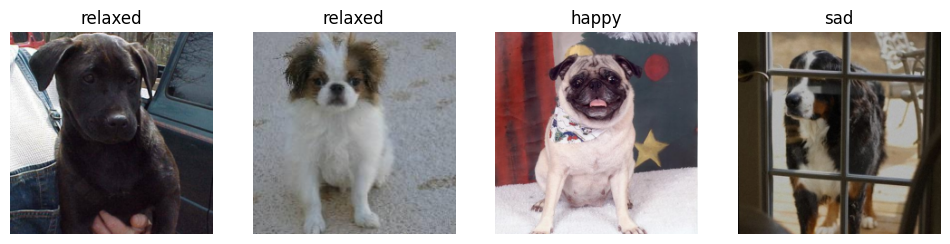

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 86.2MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.654752,0.995096,0.650000,00:25


epoch,train_loss,valid_loss,accuracy,time
0,1.067524,0.733052,0.715000,00:22
1,0.849926,0.604602,0.782500,00:21
2,0.670431,0.557182,0.787500,00:23
3,0.495164,0.538647,0.808750,00:21
4,0.370105,0.507619,0.813750,00:23
5,0.272034,0.482281,0.828750,00:21
6,0.210555,0.499400,0.826250,00:22
7,0.166531,0.477191,0.832500,00:23
8,0.132247,0.462599,0.827500,00:21
9,0.110957,0.454679,0.833750,00:23


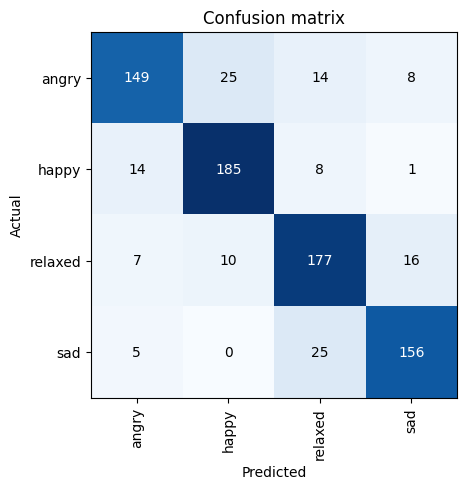

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [ ]:
interp.confusion_matrix()

array([[149,  25,  14,   8],
       [ 14, 185,   8,   1],
       [  7,  10, 177,  16],
       [  5,   0,  25, 156]])

In [ ]:
interp.most_confused()


[('angry', 'happy', 23),
 ('sad', 'relaxed', 22),
 ('happy', 'angry', 19),
 ('angry', 'relaxed', 18),
 ('relaxed', 'sad', 17),
 ('relaxed', 'happy', 13),
 ('angry', 'sad', 10),
 ('happy', 'relaxed', 8),
 ('relaxed', 'angry', 5),
 ('sad', 'happy', 3),
 ('happy', 'sad', 2),
 ('sad', 'angry', 2)]

In [ ]:
learn.export('emotion_model_new.pkl')
#moving saved model into gdrive
colab_link = "/content/emotion_model_new.pkl"
gdrive_link = "/content/drive/MyDrive/projct_dog_files/"
shutil.copy(colab_link,gdrive_link)

In [ ]:
#Added for testing
learn = load_learner('/content/emotion_model_new.pkl', cpu=False)
pred=learn.predict('/content/e6f36c00-6469-4954-a309-bf9092b59402.jpg')
print(pred[0])

In [ ]:
colab_link = "/content/"
gdrive_link = "/content/drive/MyDrive/projct_dog_files/emotion_model.pkl"
shutil.copy(gdrive_link,colab_link)

'/content/emotion_model.pkl'

In [ ]:
import cv2
from fastai.vision.widgets import *
from fastai.vision.all import *
import  numpy as np
import json
import os
from datetime import timedelta
vidcap = cv2.VideoCapture('/content/bella_dog_video_to_upload.mp4')
learn = load_learner('/content/emotion_model.pkl', cpu=False)
learn.no_bar()
learn.no_logging()
learn.recorder.silent = True

total_video_length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
success,image1 = vidcap.read()
count=0
post_frame = 0
FPS = 24.0
import uuid
detected_time_json={}
# print uuid.uuid4()
while success:
  if post_frame % 1==0:

    filename=str(uuid.uuid4())+'.jpg'
    cv2.imwrite(filename, image1)     # save frame as JPEG file
    # print(vidcap.get(CV_CAP_PROP_POS_FRAMES))
    success,image1 = vidcap.read()
    # print(cv2.CV_CAP_PROP_POS_FRAMES)
    post_frame = vidcap.get(1)

    print('/content/'+filename)
    pred=learn.predict('/content/'+filename)

    predicted_class = pred[0]    # print(predicted_class)
    frame_count = count
    os.remove(filename)
    # td = timedelta(seconds=(frame_count / FPS))
    # label='Movement '+another_object
    detected_time_json[str(int(post_frame))]=predicted_class
    print(str(post_frame)+'/'+str(total_video_length))
    print(predicted_class)
    # exit()\
    # print(image)
    # exit()
    print('Read a new frame: ', success)
  else:
    success,image1 = vidcap.read()
    post_frame = vidcap.get(1)

  count += 1
with open('result_empotion.json', 'w') as fp:
        json.dump(detected_time_json, fp)

1095.0/11362
relaxed
Read a new frame:  True
/content/db750566-aa70-4dc4-a884-e2804f2487d0.jpg


1096.0/11362
relaxed
Read a new frame:  True
/content/1cb29458-4d40-4d09-8f7a-6bec3ca6067f.jpg


1097.0/11362
relaxed
Read a new frame:  True
/content/10ad9539-2a8b-4371-a07f-d4abaf36b206.jpg


1098.0/11362
relaxed
Read a new frame:  True
/content/cf9d4a38-f7e8-471a-8327-71b4a1da2895.jpg


1099.0/11362
relaxed
Read a new frame:  True
/content/b15fe54e-8bf6-4c9f-bbc2-a5250191c93e.jpg


1100.0/11362
relaxed
Read a new frame:  True
/content/681c7ff6-ccd9-4e34-abb8-bb54e34f1f2f.jpg


1101.0/11362
relaxed
Read a new frame:  True
/content/c369da68-a28d-4590-b96c-a1265b5f55f0.jpg


1102.0/11362
relaxed
Read a new frame:  True
/content/6501ffec-da21-4dfa-a252-01d8181475a4.jpg


1103.0/11362
relaxed
Read a new frame:  True
/content/2cd6076f-0ce1-4e2b-8abb-707f5a52c2be.jpg


1104.0/11362
relaxed
Read a new frame:  True
/content/f137a3d2-0d7f-4d25-8281-73bec97971bd.jpg


1105.0/11362
relaxed
Read a new frame:  True
/content/5831d5ee-5593-4be8-84d3-aaf6c74a0ca1.jpg


1106.0/11362
relaxed
Read a new frame:  True
/content/5d8d7ff8-d403-4f30-a7b4-c2c89cbffd2e.jpg


1107.0/11362
relaxed
Read a new frame:  True
/content/02f5c89d-0006-4eff-b9ec-3c7b821e184d.jpg


1108.0/11362
relaxed
Read a new frame:  True
/content/8d30a812-b609-439a-8126-4cfadfc2af89.jpg


1109.0/11362
relaxed
Read a new frame:  True
/content/8b549a7f-6eb8-42ac-8257-9f9e383462a6.jpg


1110.0/11362
relaxed
Read a new frame:  True
/content/53153488-e9af-48b5-812e-41b96f97dd2e.jpg


1111.0/11362
relaxed
Read a new frame:  True
/content/d5e95066-f162-4dc3-81fd-df434bc4e94c.jpg


1112.0/11362
relaxed
Read a new frame:  True
/content/611b666b-d1b1-4855-b3ac-a243089c7ebc.jpg


1113.0/11362
relaxed
Read a new frame:  True
/content/1b7d1df1-799d-4ac7-8d73-f08896b87991.jpg


1114.0/11362
relaxed
Read a new frame:  True
/content/e0f4fbe1-09a6-410d-9c30-8eadbfa9deee.jpg


1115.0/11362
relaxed
Read a new frame:  True
/content/424480d4-b3dc-4887-a3b3-5b5a9ddf4766.jpg


1116.0/11362
relaxed
Read a new frame:  True
/content/6edbc983-2d0d-481e-8764-79239dad1d07.jpg


1117.0/11362
relaxed
Read a new frame:  True
/content/fadf8d28-d79a-4ae0-bfef-8a4cc511d217.jpg


1118.0/11362
relaxed
Read a new frame:  True
/content/14a03c70-f08b-4565-9b6c-a834c745be76.jpg


1119.0/11362
relaxed
Read a new frame:  True
/content/fbae0f7c-172f-40a5-8ef8-dabbe9f024c9.jpg


1120.0/11362
relaxed
Read a new frame:  True
/content/b0a3c899-fc9e-4723-8c19-304391d8d4a2.jpg


1121.0/11362
relaxed
Read a new frame:  True
/content/ef43658e-c5aa-412d-bbcc-97f37d9af20d.jpg


1122.0/11362
relaxed
Read a new frame:  True
/content/af960000-2a6c-4a1c-b24a-d0974208ab9f.jpg


1123.0/11362
relaxed
Read a new frame:  True
/content/4da42592-6f60-4c7a-ac75-c9db5b6d0111.jpg


1124.0/11362
relaxed
Read a new frame:  True
/content/2715eca3-2641-438d-99d2-6741d3284878.jpg


1125.0/11362
relaxed
Read a new frame:  True
/content/17a99ce0-1dc1-4328-b36e-4f26eb3addac.jpg


1126.0/11362
relaxed
Read a new frame:  True
/content/7d4c0d6c-4888-430f-a081-894641aeb724.jpg


1127.0/11362
relaxed
Read a new frame:  True
/content/b84d05db-1081-4add-8b9c-34e51f9b2acb.jpg


1128.0/11362
relaxed
Read a new frame:  True
/content/a61496f2-8a00-4887-9991-44a750d83f15.jpg


1129.0/11362
relaxed
Read a new frame:  True
/content/29f08f0b-2cd6-4d84-96a2-24919a24d279.jpg


1130.0/11362
relaxed
Read a new frame:  True
/content/e1b48add-e8ed-4df8-89bf-1bedde896db4.jpg


1131.0/11362
relaxed
Read a new frame:  True
/content/6ee61d87-b51a-4220-a99d-46525e914704.jpg


1132.0/11362
relaxed
Read a new frame:  True
/content/67ed576e-d6ac-4cd4-91a3-6957b2d8c5fc.jpg


1133.0/11362
relaxed
Read a new frame:  True
/content/0afcf072-a95e-48f1-aa93-30302e4b225d.jpg


1134.0/11362
relaxed
Read a new frame:  True
/content/86205244-effb-4002-85aa-3279bec58eed.jpg


1135.0/11362
relaxed
Read a new frame:  True
/content/1693695a-5fca-4ea2-93ad-46cc71d9839a.jpg


1136.0/11362
relaxed
Read a new frame:  True
/content/e066c72f-31cd-47c7-8d80-507553224d4a.jpg


1137.0/11362
relaxed
Read a new frame:  True
/content/ccdd9a5d-0c8b-4013-bdda-b55a091b3f7f.jpg


1138.0/11362
relaxed
Read a new frame:  True
/content/5789339a-4ec5-4f19-b5e4-99e45e837e8a.jpg


1139.0/11362
relaxed
Read a new frame:  True
/content/4c278a2d-daa9-4b05-8e47-287d94565b3e.jpg


1140.0/11362
relaxed
Read a new frame:  True
/content/195e352f-1a17-4d39-8dc4-55692f093b0d.jpg


1141.0/11362
relaxed
Read a new frame:  True
/content/11622d9a-3d4b-48db-bffb-348589e19818.jpg


1142.0/11362
relaxed
Read a new frame:  True
/content/dfa0bc96-00bb-43a6-bcf3-9ba89dd444dd.jpg


1143.0/11362
relaxed
Read a new frame:  True
/content/0689c004-d829-46e9-82f6-6ca07a7e8b86.jpg


1144.0/11362
relaxed
Read a new frame:  True
/content/dd62a8d1-57a3-4eb7-9848-ddbc2467abbf.jpg


1145.0/11362
relaxed
Read a new frame:  True
/content/e6a490b9-4103-4092-9782-ec4276aa4534.jpg


1146.0/11362
relaxed
Read a new frame:  True
/content/d8e84dd9-cf24-4119-871b-807281b897c1.jpg


1147.0/11362
relaxed
Read a new frame:  True
/content/82fdf7a9-6d27-4917-8459-2a9e3e81690a.jpg


1148.0/11362
relaxed
Read a new frame:  True
/content/4fbc93e2-ff3e-408f-aaa0-aa8fc23b442a.jpg


1149.0/11362
relaxed
Read a new frame:  True
/content/69b046b4-d492-489b-81e2-8ea397c5ec14.jpg


1150.0/11362
relaxed
Read a new frame:  True
/content/91273809-f7d2-48fb-a2a4-2c517a1059ee.jpg


1151.0/11362
relaxed
Read a new frame:  True
/content/21c28cbf-2ab6-4c69-9c93-7a025624b3a3.jpg


1152.0/11362
sad
Read a new frame:  True
/content/e0e23498-d71a-479c-9472-cefd4f6e860b.jpg


1153.0/11362
relaxed
Read a new frame:  True
/content/2174529d-832d-480d-b542-15f8068d5c5c.jpg


1154.0/11362
relaxed
Read a new frame:  True
/content/a3be8f81-4c39-41ac-a166-27fc29e21cb1.jpg


1155.0/11362
relaxed
Read a new frame:  True
/content/65220cde-8820-4014-b06e-64e2b7fb3eaf.jpg


1156.0/11362
sad
Read a new frame:  True
/content/e5ef564d-8580-44d5-8a32-6295e33b3042.jpg


1157.0/11362
sad
Read a new frame:  True
/content/280c4139-e8d0-4842-89fa-c90dc426705e.jpg


1158.0/11362
relaxed
Read a new frame:  True
/content/d34ef1ab-edda-4ccc-af0b-40e1fa8a66ac.jpg


1159.0/11362
relaxed
Read a new frame:  True
/content/6f8ea386-07c0-4e03-8a63-215db695fb09.jpg


1160.0/11362
relaxed
Read a new frame:  True
/content/c9cd0934-bc54-46f4-aae9-8beca390a588.jpg


1161.0/11362
relaxed
Read a new frame:  True
/content/453e1bcb-d773-4049-a505-219bee515619.jpg


1162.0/11362
relaxed
Read a new frame:  True
/content/f9c26d79-2fcf-4ce0-9916-ecef1ef0e06b.jpg


1163.0/11362
relaxed
Read a new frame:  True
/content/58ed30dc-de70-49be-9d46-32e3c4474f72.jpg


1164.0/11362
relaxed
Read a new frame:  True
/content/f762ab0f-4ed1-454d-a714-506614815add.jpg


1165.0/11362
relaxed
Read a new frame:  True
/content/848e1c0a-b855-4d9c-a480-ce99235cec34.jpg


1166.0/11362
relaxed
Read a new frame:  True
/content/5045ba2e-f501-4ee5-a013-bf09d4de0b04.jpg


1167.0/11362
relaxed
Read a new frame:  True
/content/df179be6-d7c7-4fda-aa6a-2f3463dce0aa.jpg


1168.0/11362
relaxed
Read a new frame:  True
/content/d79a30fb-0164-47fe-9d9f-93e7b78c55ec.jpg


1169.0/11362
relaxed
Read a new frame:  True
/content/7d34a7ce-5e77-4a61-8a96-cd48234db187.jpg


1170.0/11362
relaxed
Read a new frame:  True
/content/3d7a5dd6-8f0c-4235-9509-24d7c2713afc.jpg


1171.0/11362
relaxed
Read a new frame:  True
/content/fd3ec202-e645-4f6e-a115-48f9c5145f48.jpg


1172.0/11362
relaxed
Read a new frame:  True
/content/1757a888-ab1f-46d1-9a88-9cf84da2e167.jpg


1173.0/11362
sad
Read a new frame:  True
/content/53057940-a2c6-4a42-8483-e133d3c0d764.jpg


1174.0/11362
sad
Read a new frame:  True
/content/13e1182d-1f03-4faf-9a72-e95d53198abd.jpg


1175.0/11362
relaxed
Read a new frame:  True
/content/b3ff2505-728b-4a93-b1a7-842d3cf08293.jpg


1176.0/11362
relaxed
Read a new frame:  True
/content/b7609301-b068-475b-aac5-d0ba83b2a09d.jpg


1177.0/11362
sad
Read a new frame:  True
/content/25ba9b73-3191-4f40-8a59-c030f04d280a.jpg


1178.0/11362
sad
Read a new frame:  True
/content/fd6fd9e0-6982-420e-b7c9-873ccb3f5c55.jpg


1179.0/11362
relaxed
Read a new frame:  True
/content/6116266e-408c-4e5c-8e81-310a86f9598f.jpg


1180.0/11362
relaxed
Read a new frame:  True
/content/17047533-4f2e-4ac9-86ec-4d2b35e2114c.jpg


1181.0/11362
relaxed
Read a new frame:  True
/content/984af809-2ce9-475a-bc07-87080c4f1881.jpg


1182.0/11362
sad
Read a new frame:  True
/content/574625fc-17c1-4e03-aeb5-1fe70e0c7116.jpg


1183.0/11362
sad
Read a new frame:  True
/content/90b68987-c051-49e9-9ffc-39ce00f82421.jpg


1184.0/11362
relaxed
Read a new frame:  True
/content/2b36d33a-5e4c-40b6-9a65-8b1263f82042.jpg


1185.0/11362
sad
Read a new frame:  True
/content/e2263373-929f-437a-9dc1-3256975c9ed2.jpg


1186.0/11362
sad
Read a new frame:  True
/content/5be6fefb-8d15-45f0-b314-7385ae7a2bed.jpg


1187.0/11362
relaxed
Read a new frame:  True
/content/182cb981-413a-4f25-8569-fcb3c37acb9f.jpg


1188.0/11362
relaxed
Read a new frame:  True
/content/9af09cd3-bd76-433c-94f5-9f75141e9434.jpg


1189.0/11362
relaxed
Read a new frame:  True
/content/62ac8e7a-4329-4a0e-a423-8d149bd2575f.jpg


1190.0/11362
sad
Read a new frame:  True
/content/d89573a4-8486-4d21-a447-f5e1360966c5.jpg


1191.0/11362
sad
Read a new frame:  True
/content/e5f25e9f-c2e3-4f36-b92b-ed1899d5847f.jpg


1192.0/11362
sad
Read a new frame:  True
/content/013e3970-562c-4a23-bd69-02aa1d3803b3.jpg


1193.0/11362
sad
Read a new frame:  True
/content/5e21280a-5929-473a-b6f7-9875a368722a.jpg


1194.0/11362
relaxed
Read a new frame:  True
/content/c8f546c7-e8be-4bfd-9a0a-9d5b3f242791.jpg


1195.0/11362
relaxed
Read a new frame:  True
/content/706001f5-2f77-4eaf-8756-0978b1090e9e.jpg


1196.0/11362
relaxed
Read a new frame:  True
/content/5f885a15-3f9a-40e1-b252-f1e5be2d4b04.jpg


1197.0/11362
relaxed
Read a new frame:  True
/content/0f973a4a-317e-4600-89f8-13e462b75fbe.jpg


1198.0/11362
relaxed
Read a new frame:  True
/content/b40ca256-7d04-4dfb-956c-979644f67296.jpg


1199.0/11362
sad
Read a new frame:  True
/content/050663e1-46fb-41a0-bf4a-88ec25699a43.jpg


1200.0/11362
sad
Read a new frame:  True
/content/37b2dbf4-ae9a-40fe-928b-1bbde9342c2b.jpg


1201.0/11362
sad
Read a new frame:  True
/content/d2aec899-a85a-4890-b53a-e2c3f821a487.jpg


1202.0/11362
sad
Read a new frame:  True
/content/579656d6-998a-4db3-9bce-9e5f20f6448e.jpg


1203.0/11362
relaxed
Read a new frame:  True
/content/b5868f9f-8425-42cd-9f89-d94523db1c0e.jpg


1204.0/11362
sad
Read a new frame:  True
/content/e984cab5-e8d4-4f44-a87b-205025b6e215.jpg


1205.0/11362
relaxed
Read a new frame:  True
/content/f8ccfd80-f15e-4c6f-abb3-4d29141ea7a8.jpg


1206.0/11362
relaxed
Read a new frame:  True
/content/56aa5059-50dd-4a57-8b5d-a1c8329615d8.jpg


1207.0/11362
relaxed
Read a new frame:  True
/content/76230749-df2a-4445-978f-c5734e4efbf5.jpg


1208.0/11362
sad
Read a new frame:  True
/content/5b5dd76a-6008-498f-86dc-996697f573fb.jpg


1209.0/11362
sad
Read a new frame:  True
/content/58706c8d-62ea-4e3e-85a0-c2540c14f9aa.jpg


1210.0/11362
relaxed
Read a new frame:  True
/content/44ef6a07-8e08-4ae7-ac5f-ca5ffb7419be.jpg


1211.0/11362
sad
Read a new frame:  True
/content/5c9ae3bf-f91d-461d-8e4e-fd0ef6b97d3f.jpg


1212.0/11362
sad
Read a new frame:  True
/content/fd8ceef6-4f89-4872-8397-858dc6cdfb7d.jpg


1213.0/11362
sad
Read a new frame:  True
/content/d20d3214-fa17-4779-9dd9-1f789cc00cad.jpg


1214.0/11362
sad
Read a new frame:  True
/content/6dd7a0cb-154b-46e4-9ba3-d6e24e9c5f1b.jpg


1215.0/11362
sad
Read a new frame:  True
/content/0484b2c6-e4db-4fe4-bc18-62ecc419114c.jpg


1216.0/11362
sad
Read a new frame:  True
/content/56d96186-dae4-488e-85ca-9de6956b05b8.jpg


1217.0/11362
sad
Read a new frame:  True
/content/ef02b6da-dc97-4a5f-af9f-17f4acda1af6.jpg


1218.0/11362
sad
Read a new frame:  True
/content/0549f8be-029e-46e0-bc6f-4a78e9401161.jpg


1219.0/11362
sad
Read a new frame:  True
/content/b3584f9c-c1e9-4a8a-9edd-970cef1baa41.jpg


1220.0/11362
sad
Read a new frame:  True
/content/5c1b409e-8d74-4f14-9ad4-0c1f360af123.jpg


1221.0/11362
sad
Read a new frame:  True
/content/99f5367a-4d86-4822-8580-b4c36ec3d3a0.jpg


1222.0/11362
sad
Read a new frame:  True
/content/332aa4a4-6d5d-4757-a48c-5d338680a2d5.jpg


1223.0/11362
sad
Read a new frame:  True
/content/4a09cc40-85b6-4c88-9f13-67cce654b16e.jpg


1224.0/11362
sad
Read a new frame:  True
/content/767a3027-0c1f-493c-975d-43345f0f62e1.jpg


1225.0/11362
sad
Read a new frame:  True
/content/adfe00e6-c68b-412b-a5cb-bd5f82a277b2.jpg


1226.0/11362
sad
Read a new frame:  True
/content/f1eb8d81-7850-4923-bde9-68c4e7b296b8.jpg


1227.0/11362
sad
Read a new frame:  True
/content/67f5c55b-9a59-4000-859f-e7ae573ceb78.jpg


1228.0/11362
sad
Read a new frame:  True
/content/f370a268-3336-48cd-a4ef-252efef3229f.jpg


1229.0/11362
sad
Read a new frame:  True
/content/6e288f38-a2eb-493b-87e6-df9073bc8cbd.jpg


1230.0/11362
sad
Read a new frame:  True
/content/963b839a-0899-421e-bb9e-34424cf7cf13.jpg


1231.0/11362
sad
Read a new frame:  True
/content/e1c61e98-82e7-4767-a040-ea767a3e886e.jpg


1232.0/11362
sad
Read a new frame:  True
/content/fb720f4d-1a6a-4751-9b4c-605e46039633.jpg


1233.0/11362
sad
Read a new frame:  True
/content/413c2387-2061-45fd-bfe1-06f5954e0e0d.jpg


1234.0/11362
sad
Read a new frame:  True
/content/a1c06af8-8e83-4723-b965-b1d57bf4ff31.jpg


1235.0/11362
sad
Read a new frame:  True
/content/672d9c59-4494-40d9-be09-2c89f7f51e8d.jpg


1236.0/11362
sad
Read a new frame:  True
/content/816d99b0-7024-44d4-8a26-a3d744ada384.jpg


1237.0/11362
sad
Read a new frame:  True
/content/6432f07e-1ad6-4da8-b279-39b8e183d517.jpg


1238.0/11362
sad
Read a new frame:  True
/content/3de8f16b-5333-4a81-9d61-e1f79297a755.jpg


1239.0/11362
sad
Read a new frame:  True
/content/d40df5c3-6f75-4094-b9e4-3bc8dd42dbde.jpg


1240.0/11362
sad
Read a new frame:  True
/content/e53b1822-4afc-4a69-834e-3589a557ac6a.jpg


1241.0/11362
sad
Read a new frame:  True
/content/27af95b4-6e63-4c06-9c23-360c7a94142d.jpg


1242.0/11362
sad
Read a new frame:  True
/content/6f8765e7-5670-462d-86d7-1b845f613dac.jpg


1243.0/11362
sad
Read a new frame:  True
/content/b6362c4f-85c0-4a58-b40e-9c3183828f83.jpg


1244.0/11362
sad
Read a new frame:  True
/content/81c8d674-1d9a-4dd8-bd9a-7ac65719d982.jpg


1245.0/11362
sad
Read a new frame:  True
/content/1f59ff68-cd29-46ec-b402-adfa9b7fdc6e.jpg


1246.0/11362
sad
Read a new frame:  True
/content/9933f86a-9aee-4141-a9dd-a3aa7147adf1.jpg


1247.0/11362
sad
Read a new frame:  True
/content/87b4ab32-0b9d-4f0a-b426-0c4d68044221.jpg


1248.0/11362
sad
Read a new frame:  True
/content/37267acb-e3ae-4c8c-820f-1a6637958b88.jpg


1249.0/11362
sad
Read a new frame:  True
/content/cd3e945c-e75d-473b-b00b-4fed6ec45498.jpg


1250.0/11362
sad
Read a new frame:  True
/content/d471619b-4e9e-46d3-a044-e596e4b2622e.jpg


1251.0/11362
sad
Read a new frame:  True
/content/b5ce5da2-718a-448b-9144-bcba55e018d7.jpg


1252.0/11362
sad
Read a new frame:  True
/content/1bd47f78-19e0-4711-b041-515a7d047495.jpg


1253.0/11362
sad
Read a new frame:  True
/content/226c1688-01bf-4f11-b245-8fec744a3b34.jpg


1254.0/11362
sad
Read a new frame:  True
/content/6edfcd90-b507-4642-ad18-0d7d0732bd04.jpg


1255.0/11362
sad
Read a new frame:  True
/content/f478128b-2125-4592-bb76-f992b12e0e53.jpg


1256.0/11362
sad
Read a new frame:  True
/content/2d308567-d25e-4542-86db-522893db89ac.jpg


1257.0/11362
sad
Read a new frame:  True
/content/385148fc-aba4-45b6-8fc1-1f7d0a0f923c.jpg


1258.0/11362
sad
Read a new frame:  True
/content/d2e28ff7-309b-41a4-9d3c-78c7adb8ddac.jpg


1259.0/11362
sad
Read a new frame:  True
/content/f54b5fb4-547e-424b-873e-1368bd22b8e6.jpg


1260.0/11362
sad
Read a new frame:  True
/content/a4934e92-d9a3-4535-a063-c97338dfc04e.jpg


1261.0/11362
sad
Read a new frame:  True
/content/0494506d-3787-4e15-9cbd-6cc4fbab4b64.jpg


1262.0/11362
sad
Read a new frame:  True
/content/3ef2a4c2-0b50-49f3-844d-98a416796c38.jpg


1263.0/11362
relaxed
Read a new frame:  True
/content/1187c81c-0695-4d79-8f14-a8be479c8092.jpg


1264.0/11362
relaxed
Read a new frame:  True
/content/3bec9faa-f571-4378-9035-0a7b01717083.jpg


1265.0/11362
relaxed
Read a new frame:  True
/content/2fde4758-25c6-47e9-947f-74005ec95bee.jpg


1266.0/11362
sad
Read a new frame:  True
/content/c26bdcae-3ed9-4b00-aeb0-ebd6e196ae16.jpg


1267.0/11362
sad
Read a new frame:  True
/content/30621432-5eb2-449a-a70e-aed438f746f9.jpg


1268.0/11362
relaxed
Read a new frame:  True
/content/9854d25b-a07b-44db-beef-eff4f993cddf.jpg


1269.0/11362
sad
Read a new frame:  True
/content/2b22113d-84e0-48b5-85d5-03505854bf66.jpg


1270.0/11362
sad
Read a new frame:  True
/content/a707075f-9643-46e0-802b-62dc361d76dc.jpg


1271.0/11362
sad
Read a new frame:  True
/content/6285067c-a718-4ead-9575-8566f4025a77.jpg


1272.0/11362
sad
Read a new frame:  True
/content/97263de0-79a6-42e3-a94e-62e3dea1e1d9.jpg


1273.0/11362
sad
Read a new frame:  True
/content/1e63729a-c5a9-4a53-b319-c5a31db6943b.jpg


1274.0/11362
angry
Read a new frame:  True
/content/a0de9974-670d-457e-a1f2-1b33919340c4.jpg


1275.0/11362
sad
Read a new frame:  True
/content/96b65cc1-d9ea-4f3a-94c7-791e35ca149c.jpg


1276.0/11362
sad
Read a new frame:  True
/content/514b03d8-5877-4252-b638-46f1da8ae6cd.jpg


1277.0/11362
sad
Read a new frame:  True
/content/6b19eef0-19a1-4686-bda1-59fac227521a.jpg


1278.0/11362
sad
Read a new frame:  True
/content/c13bc2c5-0ce1-4c4d-9147-b822a0a947e2.jpg


1279.0/11362
relaxed
Read a new frame:  True
/content/e5d9ba1a-8f9d-45cb-9a63-d03e2ef4a446.jpg


1280.0/11362
relaxed
Read a new frame:  True
/content/a115c6df-1035-410b-8473-d141a6e82c38.jpg


1281.0/11362
happy
Read a new frame:  True
/content/4284dbcb-b6d3-4512-bc53-145b20dfd383.jpg


1282.0/11362
angry
Read a new frame:  True
/content/b5ba4aa5-f459-4f6a-956d-1c7495b09544.jpg


1283.0/11362
happy
Read a new frame:  True
/content/4a0f0c66-797f-4820-b870-a3ca3279bb8b.jpg


1284.0/11362
relaxed
Read a new frame:  True
/content/9aaef2e8-1dc3-4db1-9233-abec152d3fa3.jpg


1285.0/11362
sad
Read a new frame:  True
/content/ff24e32c-836b-47ca-89b5-928110e48e9d.jpg


1286.0/11362
sad
Read a new frame:  True
/content/fd0d5a4d-a82e-40e9-8844-a01f5bf7d1e1.jpg


1287.0/11362
relaxed
Read a new frame:  True
/content/7706ac54-611f-4eee-891c-dcbbc0dcb249.jpg


1288.0/11362
sad
Read a new frame:  True
/content/3da554f5-0110-4fd2-a840-e63a5a279a29.jpg


1289.0/11362
sad
Read a new frame:  True
/content/1c8c4bb3-e1d2-4178-84b4-9727290cc9c5.jpg


1290.0/11362
relaxed
Read a new frame:  True
/content/a5f47834-98fd-4442-97de-348a65774670.jpg


1291.0/11362
relaxed
Read a new frame:  True
/content/d870ffc4-72e6-42a3-9e0f-8357f27fdd7b.jpg


1292.0/11362
relaxed
Read a new frame:  True
/content/213cedf6-ca9e-44d1-b9f1-951f4c62e210.jpg


1293.0/11362
relaxed
Read a new frame:  True
/content/c42c9104-3282-4042-bb53-7934b062a449.jpg


1294.0/11362
sad
Read a new frame:  True
/content/5f684129-ad4b-43d7-be6d-ab5061e70f84.jpg


1295.0/11362
relaxed
Read a new frame:  True
/content/cad4ea35-aeca-4c30-9986-142ebf3f3d75.jpg


1296.0/11362
relaxed
Read a new frame:  True
/content/088c6edc-941a-45c8-937f-4764f4f30136.jpg


1297.0/11362
sad
Read a new frame:  True
/content/9a5cf1c7-bd13-4fc8-9d84-9f90d8574ca7.jpg


1298.0/11362
sad
Read a new frame:  True
/content/80f4f5ea-9b7d-4ed3-8586-72609738dc53.jpg


1299.0/11362
sad
Read a new frame:  True
/content/1b51768c-e499-47dc-9d2e-2082c23749fe.jpg


1300.0/11362
sad
Read a new frame:  True
/content/a46b717e-573c-4574-a681-4bfaf5749c77.jpg


1301.0/11362
sad
Read a new frame:  True
/content/84265e1b-169b-4301-8291-cf89d8a39f67.jpg


1302.0/11362
sad
Read a new frame:  True
/content/16239bd1-c7b6-43a2-a187-a6f967bdceda.jpg


1303.0/11362
sad
Read a new frame:  True
/content/3f6eabd7-038a-4518-934c-9424686df37c.jpg


1304.0/11362
sad
Read a new frame:  True
/content/7c83b987-7f94-4fac-aa30-07390230df43.jpg


1305.0/11362
sad
Read a new frame:  True
/content/a0f51f55-4c82-4cae-aac9-8a99567af0a7.jpg


1306.0/11362
sad
Read a new frame:  True
/content/9b907571-b286-4853-81e9-64ef718a2490.jpg


1307.0/11362
sad
Read a new frame:  True
/content/0051a64a-a875-4fd6-bdee-5631969df391.jpg


1308.0/11362
sad
Read a new frame:  True
/content/196a2345-ab08-4ebd-9050-7b3e2f7209ad.jpg


1309.0/11362
sad
Read a new frame:  True
/content/8bbe02cc-b407-497b-97b8-b8d760bc01e6.jpg


1310.0/11362
sad
Read a new frame:  True
/content/0c89f2c8-5591-424b-b719-ba14fd59f7d5.jpg


1311.0/11362
sad
Read a new frame:  True
/content/b9dc36e9-aace-4857-9412-8db0b5cb2bc7.jpg


1312.0/11362
sad
Read a new frame:  True
/content/3f2da943-f9f0-4e8f-bf10-b60ef300c8c6.jpg


1313.0/11362
relaxed
Read a new frame:  True
/content/c26a90af-949d-4fef-a037-508ccce50b1c.jpg


1314.0/11362
sad
Read a new frame:  True
/content/5fb63043-8fd0-4ce6-852a-365cbf400160.jpg


1315.0/11362
sad
Read a new frame:  True
/content/9298cb74-146e-4837-98f4-9cd1e7f5346e.jpg


1316.0/11362
sad
Read a new frame:  True
/content/83c0a4e7-2800-485f-ba79-45fa481f7f34.jpg


1317.0/11362
relaxed
Read a new frame:  True
/content/35755521-18c2-4b1a-92d4-ccf58a40c0c2.jpg


1318.0/11362
relaxed
Read a new frame:  True
/content/f221c7fb-3da7-4f53-b068-6b6561b1a1c7.jpg


1319.0/11362
relaxed
Read a new frame:  True
/content/43927936-7cd1-4732-a816-2ebcdfee7627.jpg


1320.0/11362
relaxed
Read a new frame:  True
/content/0519f347-43c5-4272-913b-eeb5db43fcde.jpg


1321.0/11362
sad
Read a new frame:  True
/content/42584767-8c40-4c14-975a-6c5271b3b9f5.jpg


1322.0/11362
sad
Read a new frame:  True
/content/d070336b-e9cc-4d02-8be2-ec2eb2ac8b4a.jpg


1323.0/11362
relaxed
Read a new frame:  True
/content/360b419d-ff67-48a2-81f4-4c734807b6df.jpg


1324.0/11362
relaxed
Read a new frame:  True
/content/4c0aff7b-8c57-4fcf-bffe-b5b3cd6c0ef8.jpg


1325.0/11362
relaxed
Read a new frame:  True
/content/4493e154-c257-43e9-bebe-bb366fa9f534.jpg


1326.0/11362
relaxed
Read a new frame:  True
/content/81f2cd8e-84e8-48c8-a475-818398f345c8.jpg


1327.0/11362
sad
Read a new frame:  True
/content/120a07b1-3e2c-4148-a107-2669fff98f20.jpg


1328.0/11362
sad
Read a new frame:  True
/content/33182cc7-bb54-4deb-9dfe-96ca3e182bd6.jpg


1329.0/11362
relaxed
Read a new frame:  True
/content/6bd464c4-e16a-471c-a08c-ab38d040c975.jpg


1330.0/11362
relaxed
Read a new frame:  True
/content/4cda0ebb-d0e2-4b68-8e8b-0cb769a2b2cd.jpg


1331.0/11362
relaxed
Read a new frame:  True
/content/42c1f36e-7102-4ec0-8edf-7ae3b14432d4.jpg


1332.0/11362
relaxed
Read a new frame:  True
/content/481a18fa-6997-429b-bb1b-70d6f825d3a7.jpg


1333.0/11362
relaxed
Read a new frame:  True
/content/0f6740e6-b49e-454e-9011-1d29dba3bb4a.jpg


1334.0/11362
relaxed
Read a new frame:  True
/content/144a85fe-9247-4932-bfe7-113b420d7b11.jpg


1335.0/11362
relaxed
Read a new frame:  True
/content/3ce24cff-b3c1-41f8-b8e9-efd5463c5440.jpg


1336.0/11362
relaxed
Read a new frame:  True
/content/3848d514-64a9-4757-857a-c9a3e684703f.jpg


1337.0/11362
relaxed
Read a new frame:  True
/content/18449cce-5ca8-4347-85e9-7bc1a2cfd819.jpg


1338.0/11362
relaxed
Read a new frame:  True
/content/b8626342-49c2-4478-acc0-72a7fd15a301.jpg


1339.0/11362
relaxed
Read a new frame:  True
/content/f9c8546f-04d0-4e02-a3fb-3dd8680523fc.jpg


1340.0/11362
relaxed
Read a new frame:  True
/content/1616bc98-1182-4235-9993-b2c371c09171.jpg


1341.0/11362
relaxed
Read a new frame:  True
/content/fbf3b586-1a31-4eb6-9570-218768b01d9d.jpg


1342.0/11362
relaxed
Read a new frame:  True
/content/2af902e3-e202-4805-b37b-074412cc7bad.jpg


1343.0/11362
relaxed
Read a new frame:  True
/content/e1755e88-74a9-42f5-922a-8f504b102d32.jpg


1344.0/11362
relaxed
Read a new frame:  True
/content/394fb394-d817-4305-8d16-2d5b380a1834.jpg


1345.0/11362
relaxed
Read a new frame:  True
/content/f52e67fa-6fab-4e53-8ce5-4df370b87e1c.jpg


1346.0/11362
relaxed
Read a new frame:  True
/content/d4b34103-99d7-458d-8cee-94e4be1a9e5d.jpg


1347.0/11362
relaxed
Read a new frame:  True
/content/6f313982-29e0-4518-aea0-b7e8953d6969.jpg


1348.0/11362
relaxed
Read a new frame:  True
/content/d0fe4556-0e43-417b-87f6-27da406e9d8e.jpg


1349.0/11362
relaxed
Read a new frame:  True
/content/e6efa4e5-bd80-4cf1-9448-bdffc6c0f2e6.jpg


1350.0/11362
relaxed
Read a new frame:  True
/content/53396508-3950-4e8b-9dba-f99d2b552ab3.jpg


1351.0/11362
relaxed
Read a new frame:  True
/content/64ba7124-8b0f-4365-a930-7316cac3a326.jpg


1352.0/11362
relaxed
Read a new frame:  True
/content/9345dc05-0844-42f3-8bc5-467b0d8864dd.jpg


1353.0/11362
relaxed
Read a new frame:  True
/content/d7009b69-b48f-4684-9ad5-a8d333bb3d83.jpg


1354.0/11362
relaxed
Read a new frame:  True
/content/5227b851-c2fe-4163-bf18-7d77298b5b15.jpg


1355.0/11362
relaxed
Read a new frame:  True
/content/9ddcafe5-5fcc-4f23-b975-abe4e4cb9509.jpg


1356.0/11362
relaxed
Read a new frame:  True
/content/7528de36-b5da-4e9d-9fdf-fdf2ed295205.jpg


1357.0/11362
relaxed
Read a new frame:  True
/content/f2138437-f614-44dd-8fdd-9d8d13c0a8c1.jpg


1358.0/11362
relaxed
Read a new frame:  True
/content/7795866d-acb8-47c6-8d04-85dcecbd69b7.jpg


1359.0/11362
relaxed
Read a new frame:  True
/content/2d507ad0-3b27-4f38-8815-2dba859e9860.jpg


1360.0/11362
relaxed
Read a new frame:  True
/content/5f0fbc7b-23aa-45fa-bf05-0e8391e16db6.jpg


1361.0/11362
relaxed
Read a new frame:  True
/content/34e37711-811e-490a-976e-486d813a98cf.jpg


1362.0/11362
relaxed
Read a new frame:  True
/content/27bce7e8-49b6-4eb7-a48f-45c08a831142.jpg


1363.0/11362
relaxed
Read a new frame:  True
/content/7e75bf88-4c06-43cc-af49-5e5320f1eb53.jpg


1364.0/11362
relaxed
Read a new frame:  True
/content/0bf2cc5a-d81d-4bb1-83be-c45616c95e7a.jpg


1365.0/11362
relaxed
Read a new frame:  True
/content/a9fddef8-64dc-4914-ace2-0eb3b928f1b2.jpg


1366.0/11362
relaxed
Read a new frame:  True
/content/5d106289-5ca6-43da-bace-6169673cd95c.jpg


1367.0/11362
relaxed
Read a new frame:  True
/content/79cc6ab9-3909-45f9-b303-72cc97f25bf1.jpg


1368.0/11362
relaxed
Read a new frame:  True
/content/ebaf5f87-4403-4ac2-8024-61ca7f62ca5b.jpg


1369.0/11362
relaxed
Read a new frame:  True
/content/2dd39f00-3f54-4b25-b9bd-d5dd9aaf78ee.jpg


1370.0/11362
relaxed
Read a new frame:  True
/content/d0cc49da-ebfa-4516-a2b7-f31113ccac7f.jpg


1371.0/11362
relaxed
Read a new frame:  True
/content/53df9965-93e2-40a6-8e3f-4cf0c65397fa.jpg


1372.0/11362
relaxed
Read a new frame:  True
/content/63756725-49f0-4d0b-939e-57b95642fb4d.jpg


1373.0/11362
relaxed
Read a new frame:  True
/content/2d51d544-23a7-459c-acbb-75d22c6a8e92.jpg


1374.0/11362
relaxed
Read a new frame:  True
/content/f0702de7-ad10-449b-a481-86c17db9e1b2.jpg


1375.0/11362
relaxed
Read a new frame:  True
/content/546edbdd-babd-468e-bdbd-19c36d925702.jpg


1376.0/11362
relaxed
Read a new frame:  True
/content/e46e36c4-2845-41a0-8ff7-a76f9e8f4383.jpg


1377.0/11362
relaxed
Read a new frame:  True
/content/5d4644dd-1d02-46cb-af16-b147507f8ccf.jpg


1378.0/11362
relaxed
Read a new frame:  True
/content/e1afb525-10da-49cf-98b7-5e574c00a6c9.jpg


1379.0/11362
relaxed
Read a new frame:  True
/content/8d11ee8f-3a84-4ebb-a2dc-635486554557.jpg


1380.0/11362
relaxed
Read a new frame:  True
/content/dc603c81-102e-4195-89a6-49e4c33654dc.jpg


1381.0/11362
relaxed
Read a new frame:  True
/content/4354ed41-1851-42f2-b98b-564cc8f63a02.jpg


1382.0/11362
relaxed
Read a new frame:  True
/content/adbd94dd-23cc-43e6-9c16-578a69b6b8d4.jpg


1383.0/11362
relaxed
Read a new frame:  True
/content/3cb23104-7b86-422c-9344-f67a4617902f.jpg


1384.0/11362
relaxed
Read a new frame:  True
/content/ffecb7d1-e0af-4973-a531-d94be7baeadf.jpg


1385.0/11362
relaxed
Read a new frame:  True
/content/4845657b-2e4e-405b-9044-b33c3070df25.jpg


1386.0/11362
relaxed
Read a new frame:  True
/content/b508d1bf-c9a5-4fa7-8f87-e1e902d6c566.jpg


1387.0/11362
relaxed
Read a new frame:  True
/content/8cf34ca9-907a-4587-a50a-b4ab09574bff.jpg


1388.0/11362
relaxed
Read a new frame:  True
/content/6b51939a-ec53-4ff5-8d95-e11982517839.jpg


1389.0/11362
relaxed
Read a new frame:  True
/content/1bd14829-28ce-4fdc-bf42-002871aea593.jpg


1390.0/11362
relaxed
Read a new frame:  True
/content/893aca1e-3062-42cb-b449-b39dcee53371.jpg


1391.0/11362
relaxed
Read a new frame:  True
/content/88d45556-b1b0-4708-b528-6e316733ae3a.jpg


1392.0/11362
relaxed
Read a new frame:  True
/content/f30f0cc9-5953-40a9-9521-4b77701ecef6.jpg


1393.0/11362
relaxed
Read a new frame:  True
/content/ad67858a-bdf4-48dd-9372-3ec428cd8e30.jpg


1394.0/11362
relaxed
Read a new frame:  True
/content/18408338-ea19-49d5-8c6b-ba95d2cf862d.jpg


1395.0/11362
relaxed
Read a new frame:  True
/content/ae329880-a235-48d5-bb34-38c8d77c44b2.jpg


1396.0/11362
relaxed
Read a new frame:  True
/content/c636fa58-cb2e-4d01-9850-1739542ba7b1.jpg


1397.0/11362
relaxed
Read a new frame:  True
/content/6a22adda-cfd4-4e6e-9c67-d88d0e275ed9.jpg


1398.0/11362
relaxed
Read a new frame:  True
/content/17d16642-c3ef-4383-861c-408a2ba8540a.jpg


1399.0/11362
relaxed
Read a new frame:  True
/content/fb77af97-0297-4944-a9c4-c894fb59d72f.jpg


1400.0/11362
relaxed
Read a new frame:  True
/content/dc2713d7-7a85-4ac4-b413-2c113820c600.jpg


1401.0/11362
relaxed
Read a new frame:  True
/content/c91560fd-a60a-45cc-9d9a-6d0eab92f9d0.jpg


1402.0/11362
relaxed
Read a new frame:  True
/content/6029e098-8770-44c8-9215-928e054fef14.jpg


1403.0/11362
relaxed
Read a new frame:  True
/content/8c3cbf61-48c1-42e5-9b18-533a58a00d27.jpg


1404.0/11362
relaxed
Read a new frame:  True
/content/5fff4054-7583-4d3c-ae3b-b485aa41b05d.jpg


1405.0/11362
relaxed
Read a new frame:  True
/content/14f3d0bb-e5ab-405e-bd91-e084a794c983.jpg


1406.0/11362
relaxed
Read a new frame:  True
/content/39a3d73e-fd33-4247-ac2a-960d2bafb8bb.jpg


1407.0/11362
relaxed
Read a new frame:  True
/content/f16e8ff2-e06e-434e-9596-145db1a73e43.jpg


1408.0/11362
relaxed
Read a new frame:  True
/content/1003c088-c665-4682-baab-b7c07b4362ff.jpg


1409.0/11362
relaxed
Read a new frame:  True
/content/47e4a351-0bcf-4935-a661-bddd69ff013f.jpg


1410.0/11362
relaxed
Read a new frame:  True
/content/33031fdd-9012-4143-ac1b-fdbc9344522d.jpg


1411.0/11362
relaxed
Read a new frame:  True
/content/7d544a63-ec0a-4bc7-8dfa-9acd7846c268.jpg


1412.0/11362
relaxed
Read a new frame:  True
/content/75447fc9-527f-4bf4-bcaa-f3edd407f875.jpg


1413.0/11362
relaxed
Read a new frame:  True
/content/9af6d1ce-0170-4d88-8437-960d8130218a.jpg


1414.0/11362
relaxed
Read a new frame:  True
/content/a0a5e4c2-2b70-4201-a000-3bb487eb2b76.jpg


1415.0/11362
relaxed
Read a new frame:  True
/content/34c74aa8-1bad-4599-a689-f0a7ed841b71.jpg


1416.0/11362
relaxed
Read a new frame:  True
/content/308e3bf7-6ec5-472c-89b8-72426f356a19.jpg


1417.0/11362
relaxed
Read a new frame:  True
/content/cd85063d-fc5d-4be5-85db-b31df754c323.jpg


1418.0/11362
relaxed
Read a new frame:  True
/content/9a701891-8ad5-4082-8c7e-23ed429fadd7.jpg


1419.0/11362
relaxed
Read a new frame:  True
/content/3280851b-f44a-4edd-8b81-5b7dfe001e52.jpg


1420.0/11362
relaxed
Read a new frame:  True
/content/6e87b064-9133-4c51-9701-5ad47c7a5d0e.jpg


1421.0/11362
relaxed
Read a new frame:  True
/content/e1875e8f-522d-406d-85b8-0765e1cd107c.jpg


1422.0/11362
relaxed
Read a new frame:  True
/content/bf455f3c-96e4-40fd-819c-5235598e7c11.jpg


1423.0/11362
relaxed
Read a new frame:  True
/content/16a525c7-17ad-4f7c-9a3a-d50e711d6773.jpg


1424.0/11362
relaxed
Read a new frame:  True
/content/20f2e191-da61-45bc-98a9-3e8407d581f8.jpg


1425.0/11362
relaxed
Read a new frame:  True
/content/2fa849ad-59c0-4a34-8c2d-9b770bcfea6d.jpg


1426.0/11362
relaxed
Read a new frame:  True
/content/62b1d0ba-e118-477b-a722-3a2ccc536992.jpg


1427.0/11362
relaxed
Read a new frame:  True
/content/7bf270a0-5047-4d8c-8e75-f002561cdf26.jpg


1428.0/11362
relaxed
Read a new frame:  True
/content/673f7ddd-f589-44f8-8ffd-aa79815bdc36.jpg


1429.0/11362
relaxed
Read a new frame:  True
/content/c6b4559c-2b6c-4893-b8b9-66bf0e38054e.jpg


1430.0/11362
relaxed
Read a new frame:  True
/content/2fe05ac1-7f58-4fac-881c-3cb54fc82ef8.jpg


1431.0/11362
relaxed
Read a new frame:  True
/content/a4d5a6dc-964c-4b7d-9927-cc90304a1b19.jpg


1432.0/11362
relaxed
Read a new frame:  True
/content/3cd95533-363a-4a6e-8a69-836396f866fa.jpg


1433.0/11362
relaxed
Read a new frame:  True
/content/84fa206a-9869-4416-a064-92f7070c34b1.jpg


1434.0/11362
relaxed
Read a new frame:  True
/content/8a60ffe7-8f65-40c2-8082-a90bf2bbeca5.jpg


1435.0/11362
relaxed
Read a new frame:  True
/content/31297a15-5e52-417b-a1da-e839a6e942f0.jpg


1436.0/11362
relaxed
Read a new frame:  True
/content/cea8d26a-2ba5-4eeb-a339-07320eefc65d.jpg


1437.0/11362
relaxed
Read a new frame:  True
/content/e0239f34-7e86-4e02-9a25-5151487bc7f3.jpg


1438.0/11362
relaxed
Read a new frame:  True
/content/38346e2d-a4d6-4fb9-b5a3-ff0886c4b181.jpg


1439.0/11362
relaxed
Read a new frame:  True
/content/180a0267-f0b9-41e4-89f4-b6c743ee53b7.jpg


1440.0/11362
relaxed
Read a new frame:  True
/content/4834a23b-1d0f-4987-933a-8c84b226c9e7.jpg


1441.0/11362
relaxed
Read a new frame:  True
/content/660b8237-adce-443f-b323-c915233f2fda.jpg


1442.0/11362
relaxed
Read a new frame:  True
/content/708f075b-d919-47f4-94a2-abbd7ec0f8c7.jpg


1443.0/11362
relaxed
Read a new frame:  True
/content/2e09d879-4039-48af-81b5-750ea6446caf.jpg


1444.0/11362
relaxed
Read a new frame:  True
/content/5fe6534e-052b-4ad1-bb3b-ee825c4d8d7b.jpg


1445.0/11362
relaxed
Read a new frame:  True
/content/57f703af-23dd-4b16-a7be-393abc8ce006.jpg


1446.0/11362
relaxed
Read a new frame:  True
/content/a055d451-37a8-4acd-a243-e90edcb96ee3.jpg


1447.0/11362
relaxed
Read a new frame:  True
/content/abb10aa5-2526-468d-b764-93bc4f019cf3.jpg


1448.0/11362
relaxed
Read a new frame:  True
/content/9451f637-f713-4d24-a6bf-1ac87f5b2423.jpg


1449.0/11362
relaxed
Read a new frame:  True
/content/dc5cc446-67c2-4ec5-90ca-6ede743351de.jpg


1450.0/11362
relaxed
Read a new frame:  True
/content/89bb3222-cc7e-485d-8619-df0412b27ba3.jpg


1451.0/11362
relaxed
Read a new frame:  True
/content/4c6ea502-fc81-457b-94ff-8f7e906b586d.jpg


1452.0/11362
relaxed
Read a new frame:  True
/content/86c96e75-866e-4da1-8eb2-ae567851a93d.jpg


1453.0/11362
relaxed
Read a new frame:  True
/content/f07e1c5f-3293-4d3c-b8a8-059f60fde0d2.jpg


1454.0/11362
relaxed
Read a new frame:  True
/content/e5c03364-8b9b-43f8-bf71-29a7d29ce419.jpg


1455.0/11362
relaxed
Read a new frame:  True
/content/b93aeac8-96c2-4148-9dfa-2c5ae26644af.jpg


1456.0/11362
relaxed
Read a new frame:  True
/content/6776f22a-44d0-4df6-93c5-185cdb15ea41.jpg


1457.0/11362
relaxed
Read a new frame:  True
/content/b6c89c23-42a1-467f-a114-d130f09cd99c.jpg


1458.0/11362
relaxed
Read a new frame:  True
/content/647948cd-4009-4d0f-95e7-125fa2c8f8c9.jpg


1459.0/11362
relaxed
Read a new frame:  True
/content/01ae9fec-5d6c-408f-ba63-69734f8fe5ca.jpg


1460.0/11362
relaxed
Read a new frame:  True
/content/f965f857-21f7-464b-9885-242c4cfd0eb3.jpg


1461.0/11362
relaxed
Read a new frame:  True
/content/b882092a-e3c2-4f00-b4af-dce623a4c790.jpg


1462.0/11362
relaxed
Read a new frame:  True
/content/a649b93d-7511-4325-857d-d4e14dbf73c8.jpg


1463.0/11362
relaxed
Read a new frame:  True
/content/dc873495-0322-43a6-a249-306e5f4c8da5.jpg


1464.0/11362
relaxed
Read a new frame:  True
/content/2b9b1d69-123a-4d6b-84b2-27338d64a861.jpg


1465.0/11362
relaxed
Read a new frame:  True
/content/797bad3e-de8a-4601-bda5-432fc15860a5.jpg


1466.0/11362
relaxed
Read a new frame:  True
/content/2b4d2032-861f-4b4c-b34e-3b6f3ef9f3c9.jpg


1467.0/11362
relaxed
Read a new frame:  True
/content/06f2a6d0-cb09-453b-9942-3502d663cea1.jpg


1468.0/11362
relaxed
Read a new frame:  True
/content/4cd2a4c4-0332-42e1-9953-c9e00e1d4813.jpg


1469.0/11362
relaxed
Read a new frame:  True
/content/b2eb4b6e-b8b5-4f7a-aa0f-d948e7e08b96.jpg


1470.0/11362
relaxed
Read a new frame:  True
/content/5728d1b8-94a7-4680-ae28-87b9bed3f10e.jpg


1471.0/11362
relaxed
Read a new frame:  True
/content/389fdc68-1d21-4b1d-a431-e9b4dcd3809e.jpg


1472.0/11362
relaxed
Read a new frame:  True
/content/93e04660-dc47-4de5-9e76-5907d91eb698.jpg


1473.0/11362
relaxed
Read a new frame:  True
/content/9568e0d7-a29a-456f-a34b-c81ee72a1986.jpg


1474.0/11362
relaxed
Read a new frame:  True
/content/645f556b-775f-4084-bc55-d0c1be90c817.jpg


1475.0/11362
relaxed
Read a new frame:  True
/content/2d8eb1fc-dd1f-4f94-b6f3-a119df2293db.jpg


1476.0/11362
relaxed
Read a new frame:  True
/content/7f216f68-0cd0-441e-b91d-99dc4f7a0ab7.jpg


1477.0/11362
relaxed
Read a new frame:  True
/content/eef468f7-c071-420e-a6dc-bac1a5009fa2.jpg


1478.0/11362
relaxed
Read a new frame:  True
/content/49d254d3-91ca-4409-a25c-98db63f790cb.jpg


1479.0/11362
relaxed
Read a new frame:  True
/content/9c34e4dc-6d07-4ba9-abd9-9078814f9bd6.jpg


1480.0/11362
relaxed
Read a new frame:  True
/content/e35f4063-1935-46da-a7f9-3575e9b4b824.jpg


1481.0/11362
relaxed
Read a new frame:  True
/content/3a8c6765-6ac6-4897-8911-fa878ba0a83d.jpg


1482.0/11362
relaxed
Read a new frame:  True
/content/31aaaa17-e2e4-4583-b1de-684ddc6bba31.jpg


1483.0/11362
relaxed
Read a new frame:  True
/content/ca9e24f6-c0ec-4db4-a53f-4d2b1cf98b83.jpg


1484.0/11362
relaxed
Read a new frame:  True
/content/f88da5cf-df59-4543-83bb-c9fe9826e0e7.jpg


1485.0/11362
relaxed
Read a new frame:  True
/content/59d54966-1a10-455f-998b-660203e94b02.jpg


1486.0/11362
relaxed
Read a new frame:  True
/content/a3ae3eb1-2c8b-4475-a7ba-1d3e4430f954.jpg


1487.0/11362
relaxed
Read a new frame:  True
/content/4284dbf1-d55a-4151-8188-5d763e9ab707.jpg


1488.0/11362
relaxed
Read a new frame:  True
/content/7aa5e0d8-6daf-4e01-9400-afc571499bc9.jpg


1489.0/11362
relaxed
Read a new frame:  True
/content/ff073085-9ade-479d-82f1-b2bda10f3c6a.jpg


1490.0/11362
relaxed
Read a new frame:  True
/content/e9929786-1001-4d87-a84a-6b8a91e521dc.jpg


1491.0/11362
relaxed
Read a new frame:  True
/content/946a90f0-5f5e-47ba-b29a-326d220fa616.jpg


1492.0/11362
relaxed
Read a new frame:  True
/content/b718cca9-c548-489a-9545-e36658194761.jpg


1493.0/11362
relaxed
Read a new frame:  True
/content/a1b1e831-6a0a-4182-9434-a98178e4f40b.jpg


1494.0/11362
relaxed
Read a new frame:  True
/content/4a5bc57b-258d-4a3e-8f19-62d2523a7106.jpg


1495.0/11362
relaxed
Read a new frame:  True
/content/fa11c023-a390-4a8d-9be2-7fed9f56e191.jpg


1496.0/11362
relaxed
Read a new frame:  True
/content/25511e2d-303e-435a-81a4-b9a36e72a67d.jpg


1497.0/11362
relaxed
Read a new frame:  True
/content/3ce5347e-a842-4c3f-84f0-09461d8198fa.jpg


1498.0/11362
relaxed
Read a new frame:  True
/content/729af979-01e5-47ab-a7ca-368f78dcbd21.jpg


1499.0/11362
relaxed
Read a new frame:  True
/content/094549b1-8838-4f96-a31d-e125d91fff6a.jpg


1500.0/11362
relaxed
Read a new frame:  True
/content/0bb9b587-e88e-4e6a-b69b-c06b23711720.jpg


1501.0/11362
relaxed
Read a new frame:  True
/content/47dd2061-f235-448e-b3e8-4f3a242da1e1.jpg


1502.0/11362
relaxed
Read a new frame:  True
/content/28ce3b5c-d4a6-4859-8092-005151f707b8.jpg


1503.0/11362
relaxed
Read a new frame:  True
/content/02ae5b0f-2d4c-48da-86de-a847a9f95535.jpg


1504.0/11362
relaxed
Read a new frame:  True
/content/d032725d-58ec-4469-b18d-6074fb7ea214.jpg


1505.0/11362
relaxed
Read a new frame:  True
/content/6fd0a39e-2b2d-463b-bdc6-32a85091d6cd.jpg


1506.0/11362
relaxed
Read a new frame:  True
/content/c596ab69-1f72-43a9-b4e9-1426ad984756.jpg


1507.0/11362
relaxed
Read a new frame:  True
/content/b792a1db-1eaa-48d2-9405-c92311e606fd.jpg


1508.0/11362
relaxed
Read a new frame:  True
/content/311126c8-2848-47fb-a157-a8bd6b3b3a4c.jpg


1509.0/11362
relaxed
Read a new frame:  True
/content/9ab772c4-a968-401c-871e-2d795bcdd3d6.jpg


1510.0/11362
relaxed
Read a new frame:  True
/content/dce2e9ab-6a09-4d1e-90d0-4396ac2cf27b.jpg


1511.0/11362
relaxed
Read a new frame:  True
/content/6f768d08-eb60-4455-a14c-5fd2d9f64df9.jpg


1512.0/11362
relaxed
Read a new frame:  True
/content/db423fe9-b30d-4693-a38d-4f2807b528b6.jpg


1513.0/11362
relaxed
Read a new frame:  True
/content/52f72a17-0100-41a7-9db2-d79748ba9a0b.jpg


1514.0/11362
relaxed
Read a new frame:  True
/content/09403350-38fd-4b5a-add9-6309ec17805d.jpg


1515.0/11362
relaxed
Read a new frame:  True
/content/e5c5161f-c229-40bf-b053-19633f7e15f1.jpg


1516.0/11362
relaxed
Read a new frame:  True
/content/00f0f4d6-7ec9-49f8-a5d9-ec528aacfe7a.jpg


1517.0/11362
relaxed
Read a new frame:  True
/content/703aef35-b755-4458-a2d8-79529d138839.jpg


1518.0/11362
relaxed
Read a new frame:  True
/content/0e5c876b-1548-4612-a0ef-3f439d9778fb.jpg


1519.0/11362
relaxed
Read a new frame:  True
/content/9a1dd339-b09a-4215-9df0-807a596f427e.jpg


1520.0/11362
relaxed
Read a new frame:  True
/content/7c1e01b5-51a0-4259-afa0-b3560b14884d.jpg


1521.0/11362
relaxed
Read a new frame:  True
/content/77d31c9c-d374-42ff-9851-2f96621bbf82.jpg


1522.0/11362
relaxed
Read a new frame:  True
/content/37493d28-6b17-4147-bb1c-974b9d260e84.jpg


1523.0/11362
relaxed
Read a new frame:  True
/content/dc96a110-e2b2-4229-a1be-f646ec42d7e0.jpg


1524.0/11362
relaxed
Read a new frame:  True
/content/b4cbce12-d1ea-4057-b77f-b3e19912cafd.jpg


1525.0/11362
relaxed
Read a new frame:  True
/content/87758c59-5498-4d9e-820b-91508ec4d970.jpg


1526.0/11362
relaxed
Read a new frame:  True
/content/515062b5-44f4-432e-94ef-78f368ac7a76.jpg


1527.0/11362
relaxed
Read a new frame:  True
/content/c6d1ed71-ade9-441b-9735-62c65fd4ace5.jpg


1528.0/11362
relaxed
Read a new frame:  True
/content/65b3de32-55d4-4368-887a-ae57483e4564.jpg


1529.0/11362
relaxed
Read a new frame:  True
/content/c858cc59-ba38-4c5c-ad94-7a846f44770a.jpg


1530.0/11362
relaxed
Read a new frame:  True
/content/20f4adc5-1a1b-4a88-9dae-e90273fb7470.jpg


1531.0/11362
relaxed
Read a new frame:  True
/content/1e4442c6-02aa-40bb-a12f-4a86d2b554be.jpg


1532.0/11362
relaxed
Read a new frame:  True
/content/d39cf864-2138-4e72-b243-ae142f1bfe1e.jpg


1533.0/11362
relaxed
Read a new frame:  True
/content/d680590c-4195-4f8b-bce9-ab4ff10741a3.jpg


1534.0/11362
relaxed
Read a new frame:  True
/content/29b42d57-d96f-4eb1-ad92-1eafbea6b208.jpg


1535.0/11362
relaxed
Read a new frame:  True
/content/7ce7e111-dac1-4b7d-986f-a18dd147e4d9.jpg


1536.0/11362
relaxed
Read a new frame:  True
/content/92e3ff90-de51-419e-881a-94b34f5800c9.jpg


1537.0/11362
relaxed
Read a new frame:  True
/content/c21000e8-e4b4-41b1-83a1-8a45c99fe735.jpg


1538.0/11362
relaxed
Read a new frame:  True
/content/57ac979a-3e5a-4afc-862d-1400b0130948.jpg


1539.0/11362
relaxed
Read a new frame:  True
/content/db626645-9872-4f20-9530-376837e5052c.jpg


1540.0/11362
relaxed
Read a new frame:  True
/content/9f9e9fcd-3cd3-494d-9d38-d283de48ae0b.jpg


1541.0/11362
relaxed
Read a new frame:  True
/content/76afab2e-9532-4e65-9de4-102fae5f700b.jpg


1542.0/11362
relaxed
Read a new frame:  True
/content/f82ef0d3-d82b-49e4-a0fa-91c0c46dc4ec.jpg


1543.0/11362
relaxed
Read a new frame:  True
/content/2604dc49-de6c-49fc-ba59-5697e0f0ebed.jpg


1544.0/11362
relaxed
Read a new frame:  True
/content/8b0de22e-786d-4712-a973-079174a7e54b.jpg


1545.0/11362
relaxed
Read a new frame:  True
/content/d30af319-a33c-4deb-a64b-34f8280b1f48.jpg


1546.0/11362
relaxed
Read a new frame:  True
/content/5bdf88d4-01a3-41e8-b815-b1b94627a95b.jpg


1547.0/11362
relaxed
Read a new frame:  True
/content/d489ea36-cd43-40c8-a130-23c4b055c9ac.jpg


1548.0/11362
relaxed
Read a new frame:  True
/content/6496384c-9a9b-432e-8c80-9b105b0fb622.jpg


1549.0/11362
relaxed
Read a new frame:  True
/content/9d6bb8bb-1973-488d-9fd6-9439e8108cb1.jpg


1550.0/11362
relaxed
Read a new frame:  True
/content/bb0c6b92-a12a-4421-8887-af4feaa0101a.jpg


1551.0/11362
relaxed
Read a new frame:  True
/content/62819ba9-ee26-47b1-a45f-2e1f54185295.jpg


1552.0/11362
relaxed
Read a new frame:  True
/content/12207591-b529-4de7-949b-0b9f047a07a0.jpg


1553.0/11362
relaxed
Read a new frame:  True
/content/0fe4c340-1c08-4179-b186-2f5d37c8747e.jpg


1554.0/11362
relaxed
Read a new frame:  True
/content/6db01ab2-b25f-435a-b6c8-469af25c8c5e.jpg


1555.0/11362
relaxed
Read a new frame:  True
/content/d72bac42-a70c-47b9-b800-0eca009efc99.jpg


1556.0/11362
relaxed
Read a new frame:  True
/content/d96892ad-b759-4d2d-9ebf-99e657357ae9.jpg


1557.0/11362
relaxed
Read a new frame:  True
/content/ac8c363e-b871-4de4-a424-b86d4b2f3204.jpg


1558.0/11362
relaxed
Read a new frame:  True
/content/ed330d8b-643b-42f3-ad2d-b74ae0c4e1c3.jpg


1559.0/11362
relaxed
Read a new frame:  True
/content/dbc7aa5c-9358-4ac1-bef6-84d50c4e2d67.jpg


1560.0/11362
relaxed
Read a new frame:  True
/content/e100bed8-ac3f-4943-9d85-bfd9fd51dcd1.jpg


1561.0/11362
relaxed
Read a new frame:  True
/content/67c8d0bc-fc2c-4660-81eb-9b524f0e5e22.jpg


1562.0/11362
relaxed
Read a new frame:  True
/content/3c7c50c7-af11-4151-a02d-1df2bdc677db.jpg


1563.0/11362
relaxed
Read a new frame:  True
/content/a6767d08-ae8d-4e25-a428-669d6e5c22d3.jpg


1564.0/11362
relaxed
Read a new frame:  True
/content/a3a4babf-ac30-4ddb-bb05-7bcf9a311a31.jpg


1565.0/11362
relaxed
Read a new frame:  True
/content/95ca02ff-cc84-43cd-be44-7baed4e61025.jpg


1566.0/11362
relaxed
Read a new frame:  True
/content/e6f9e032-24b3-495b-a8c6-a78048115bdc.jpg


1567.0/11362
relaxed
Read a new frame:  True
/content/fd3b2b4e-5abb-4105-a944-3bbe5ee6f0a7.jpg


1568.0/11362
relaxed
Read a new frame:  True
/content/d644e4a8-1ab9-4437-a9c6-3189222c7d8e.jpg


1569.0/11362
relaxed
Read a new frame:  True
/content/c8216656-c219-4eae-b220-0742a9293a59.jpg


1570.0/11362
relaxed
Read a new frame:  True
/content/502be3cd-75c3-4b72-b095-1763976fd34b.jpg


1571.0/11362
relaxed
Read a new frame:  True
/content/cb3200eb-d62f-4637-b607-c7849679098a.jpg


1572.0/11362
relaxed
Read a new frame:  True
/content/680300c4-9f41-4510-a923-b9ca3d9a34e0.jpg


1573.0/11362
relaxed
Read a new frame:  True
/content/d40b159d-dd01-488b-980b-f6408f3024ab.jpg


1574.0/11362
relaxed
Read a new frame:  True
/content/449432ad-1185-4b8d-b7b5-fe5c0bca5895.jpg


1575.0/11362
relaxed
Read a new frame:  True
/content/ca433541-054f-4343-9d5f-847fe5b88436.jpg


1576.0/11362
relaxed
Read a new frame:  True
/content/753f954a-af77-4e52-9d50-71517ede8b23.jpg


1577.0/11362
relaxed
Read a new frame:  True
/content/c8bf657e-58d4-49d5-b1d0-a7acb4348d36.jpg


1578.0/11362
relaxed
Read a new frame:  True
/content/9437bda5-4a51-4f81-bf75-66c5b38c6d31.jpg


1579.0/11362
relaxed
Read a new frame:  True
/content/699caf49-096a-4561-aab1-b7669a8dc20d.jpg


1580.0/11362
relaxed
Read a new frame:  True
/content/5978c32d-f887-4f09-b7a3-fc3e8705cba2.jpg


1581.0/11362
relaxed
Read a new frame:  True
/content/ab6ba74e-15f7-4fb0-9842-209e6114bbfa.jpg


1582.0/11362
relaxed
Read a new frame:  True
/content/cc93c16d-0e23-44fb-9a20-0246a6fd13d0.jpg


1583.0/11362
relaxed
Read a new frame:  True
/content/aca50455-0a50-4602-b38b-f2f033c530e0.jpg


1584.0/11362
relaxed
Read a new frame:  True
/content/2fe52e88-cc21-4b6b-a54f-ad3f6c8f4fd3.jpg


1585.0/11362
relaxed
Read a new frame:  True
/content/868d8e5f-5cdf-4bdd-be0f-26f4367d47af.jpg


1586.0/11362
relaxed
Read a new frame:  True
/content/26a61f3e-070b-4306-88ee-215f32ee44a6.jpg


1587.0/11362
relaxed
Read a new frame:  True
/content/513cbfe5-b96b-468e-8748-19fe2f088464.jpg


1588.0/11362
relaxed
Read a new frame:  True
/content/09a36cd0-bb2e-480d-8562-b3a081707615.jpg


1589.0/11362
relaxed
Read a new frame:  True
/content/a8fec25b-d9c8-42fe-843b-e1ba38d04d28.jpg


1590.0/11362
relaxed
Read a new frame:  True
/content/fa7e8e5e-f566-4aeb-ae2c-05c14d2fc2da.jpg


1591.0/11362
relaxed
Read a new frame:  True
/content/9fcd4997-acc5-46e2-aa80-4e1e79a1236c.jpg


1592.0/11362
relaxed
Read a new frame:  True
/content/ac39701b-cf5c-4b4b-a6f7-4571365b8e30.jpg


1593.0/11362
relaxed
Read a new frame:  True
/content/a40156f8-af91-4577-8db5-ca4388da2bc5.jpg


1594.0/11362
relaxed
Read a new frame:  True
/content/ad03ad81-fd80-47ab-9a1e-c8611afdc8d3.jpg


1595.0/11362
relaxed
Read a new frame:  True
/content/b1501de9-4681-4873-b7b3-c7eedb596a1f.jpg


1596.0/11362
relaxed
Read a new frame:  True
/content/3e51e463-d2f9-4a25-9cc4-815de72245dd.jpg


1597.0/11362
relaxed
Read a new frame:  True
/content/b7f62d0e-7dc2-47e3-ac6a-028cdc9eac50.jpg


1598.0/11362
relaxed
Read a new frame:  True
/content/7bac2a30-e6a4-4967-8cbf-f714d58169b7.jpg


1599.0/11362
relaxed
Read a new frame:  True
/content/adbc09a4-115c-4889-a461-bd91d5b26835.jpg


1600.0/11362
relaxed
Read a new frame:  True
/content/937aaf51-96b9-4cdb-8a48-d2fb386689c9.jpg


1601.0/11362
relaxed
Read a new frame:  True
/content/92628eb8-8cd0-4087-9f3e-bd8b2a4623e4.jpg


1602.0/11362
relaxed
Read a new frame:  True
/content/963354ca-c608-430c-80f3-07c95312e7b8.jpg


1603.0/11362
relaxed
Read a new frame:  True
/content/98f3e491-f88b-440f-b43c-f5fb6ae298ca.jpg


1604.0/11362
relaxed
Read a new frame:  True
/content/ed73851e-6b34-4538-8a0c-36609e32180b.jpg


1605.0/11362
relaxed
Read a new frame:  True
/content/f4926bc5-14b8-44d6-90d7-c0a512c47d47.jpg


1606.0/11362
relaxed
Read a new frame:  True
/content/f0aa5880-fc02-420d-b581-234a34bab637.jpg


1607.0/11362
relaxed
Read a new frame:  True
/content/4d9799a1-4de4-474c-ac10-39144dc87406.jpg


1608.0/11362
relaxed
Read a new frame:  True
/content/012da0b6-2143-4d96-b3cf-cd60b45f3688.jpg


1609.0/11362
relaxed
Read a new frame:  True
/content/b197a533-c1be-4850-8a98-4d6b35865026.jpg


1610.0/11362
relaxed
Read a new frame:  True
/content/a2004ada-e227-4205-bcf9-540405e3d27a.jpg


1611.0/11362
relaxed
Read a new frame:  True
/content/e6ca170f-d310-4b44-a3e4-7135eef70d7c.jpg


1612.0/11362
relaxed
Read a new frame:  True
/content/9c916575-9703-4330-bdfa-2d51828892d0.jpg


1613.0/11362
relaxed
Read a new frame:  True
/content/2c271d7b-fc94-4fbd-a100-aa3680635b6d.jpg


1614.0/11362
relaxed
Read a new frame:  True
/content/cba6b25a-b2da-4a8e-b3ef-624820500da6.jpg


1615.0/11362
relaxed
Read a new frame:  True
/content/93bf7d33-b018-47d8-9474-e6cddcee520e.jpg


1616.0/11362
relaxed
Read a new frame:  True
/content/398e6b33-3ea4-455d-ad69-13dd00cba85a.jpg


1617.0/11362
relaxed
Read a new frame:  True
/content/30502a39-fe99-4421-a968-bf53bdc583a6.jpg


1618.0/11362
relaxed
Read a new frame:  True
/content/e896d818-442a-4747-b8ae-f7c8654cfdc3.jpg


1619.0/11362
relaxed
Read a new frame:  True
/content/27ae291f-8d29-4be1-a3da-a789ac650985.jpg


1620.0/11362
relaxed
Read a new frame:  True
/content/bcddc2a7-0a25-4c2a-8cfd-203f8babed7a.jpg


1621.0/11362
relaxed
Read a new frame:  True
/content/5c7fe36b-d470-42eb-b909-ed16f1334711.jpg


1622.0/11362
relaxed
Read a new frame:  True
/content/b458e033-f394-4e99-a7d4-f1b6fc48ddac.jpg


1623.0/11362
relaxed
Read a new frame:  True
/content/eba56dae-7522-4c25-b5fb-9061ab0aa041.jpg


1624.0/11362
relaxed
Read a new frame:  True
/content/229d15d6-7c1b-4115-b3aa-fca05ecc36b1.jpg


1625.0/11362
relaxed
Read a new frame:  True
/content/196c7c81-3fcc-487d-a29a-38ce58793827.jpg


1626.0/11362
relaxed
Read a new frame:  True
/content/327af812-2cf8-413a-830e-73e4e2dca5f3.jpg


1627.0/11362
relaxed
Read a new frame:  True
/content/138d3b12-5854-4d4d-b5dd-27194e5a2fab.jpg


1628.0/11362
relaxed
Read a new frame:  True
/content/a4f0498e-644c-4493-8b41-536120076f29.jpg


1629.0/11362
relaxed
Read a new frame:  True
/content/3fd0976e-6490-4c82-b86f-edb9febbaf57.jpg


1630.0/11362
relaxed
Read a new frame:  True
/content/3411ce1a-c908-405b-8aa0-0db61a1ac41a.jpg


1631.0/11362
relaxed
Read a new frame:  True
/content/3f37c5ec-40ae-44d6-9786-5aac0c51b15a.jpg


1632.0/11362
relaxed
Read a new frame:  True
/content/4a93d2c5-ec0c-4ab1-b0cc-e6984c4d2e38.jpg


1633.0/11362
relaxed
Read a new frame:  True
/content/9f1ea939-c545-4c78-8bc5-e1fb2d10c5dc.jpg


1634.0/11362
relaxed
Read a new frame:  True
/content/2da1dec8-cb71-453f-a4c1-b0497a901b57.jpg


1635.0/11362
relaxed
Read a new frame:  True
/content/0bac0507-e83d-4929-aab0-01031d483416.jpg


1636.0/11362
relaxed
Read a new frame:  True
/content/6b4a0d53-7e6d-41b4-b72b-7cf67caba33b.jpg


1637.0/11362
relaxed
Read a new frame:  True
/content/57d80be2-2f57-468e-b9b3-6118f1608df8.jpg


1638.0/11362
relaxed
Read a new frame:  True
/content/c1e5a3d8-1b7b-4d5e-bb95-0eb4ab8ffbce.jpg


1639.0/11362
relaxed
Read a new frame:  True
/content/a3ce2a6a-ea49-499b-a3d6-eedcd7980179.jpg


1640.0/11362
relaxed
Read a new frame:  True
/content/5694f11f-544a-4dcb-ba59-57f41b1a46fe.jpg


1641.0/11362
relaxed
Read a new frame:  True
/content/f3528b7f-7917-48a8-a295-35e39d9c40c6.jpg


1642.0/11362
relaxed
Read a new frame:  True
/content/93fb37be-e4b4-4d64-a64e-f7ee37d04a88.jpg


1643.0/11362
relaxed
Read a new frame:  True
/content/d0f88e3b-cd77-41be-a4aa-e92a66f34540.jpg


1644.0/11362
relaxed
Read a new frame:  True
/content/dd601fe5-99f2-4613-83ba-b39dc5584c15.jpg


1645.0/11362
relaxed
Read a new frame:  True
/content/f08d726c-ec00-4371-844a-53d556adb3af.jpg


1646.0/11362
relaxed
Read a new frame:  True
/content/7a4071d0-e973-42b1-972d-62210a362ed8.jpg


1647.0/11362
relaxed
Read a new frame:  True
/content/138a22c9-b278-4325-b478-720bcecaaa88.jpg


1648.0/11362
relaxed
Read a new frame:  True
/content/1f5aefda-66c2-4922-b7bf-151d77c36137.jpg


1649.0/11362
relaxed
Read a new frame:  True
/content/01915300-41e2-4fe6-9494-e2e8257568f3.jpg


1650.0/11362
relaxed
Read a new frame:  True
/content/980c36da-d0bb-45a5-8f2c-1708b4057ac9.jpg


1651.0/11362
relaxed
Read a new frame:  True
/content/b99c22a4-c87a-41e4-821c-fa597108b276.jpg


1652.0/11362
relaxed
Read a new frame:  True
/content/4818d856-bc9d-4877-8134-08febfe66ce0.jpg


1653.0/11362
relaxed
Read a new frame:  True
/content/64fd1475-f3ec-447c-ad0b-6cd308e7b3ad.jpg


1654.0/11362
relaxed
Read a new frame:  True
/content/bd45fb96-f552-4f58-ad0c-00ac59698df9.jpg


1655.0/11362
relaxed
Read a new frame:  True
/content/fe0ad0e5-19a9-4819-9589-51abc8e967f7.jpg


1656.0/11362
relaxed
Read a new frame:  True
/content/a19e4995-ce7d-435a-a7d6-8eaab83bee07.jpg


1657.0/11362
relaxed
Read a new frame:  True
/content/95ae1697-c053-49b0-a120-9e66fa5277ab.jpg


1658.0/11362
relaxed
Read a new frame:  True
/content/686f60e2-1896-499f-8d4e-2f0e50acba6c.jpg


1659.0/11362
relaxed
Read a new frame:  True
/content/d9760347-1e79-43b2-a07c-6e6c5b2caa80.jpg


1660.0/11362
relaxed
Read a new frame:  True
/content/7f12ee20-e524-4c00-b960-607cd72bee00.jpg


1661.0/11362
relaxed
Read a new frame:  True
/content/2943f37a-f456-47ad-91d4-8d0b23be3b23.jpg


1662.0/11362
relaxed
Read a new frame:  True
/content/9bb30a10-b8f7-4b9b-9150-c0744866f6a5.jpg


1663.0/11362
relaxed
Read a new frame:  True
/content/129dac90-42c8-497c-9a0d-5ea9fb20cf6f.jpg


1664.0/11362
relaxed
Read a new frame:  True
/content/93ba4a79-6fbf-4cd1-a1a7-0fd53a24c96d.jpg


1665.0/11362
relaxed
Read a new frame:  True
/content/0883ce25-3ec9-4aa1-9740-4405a5529279.jpg


1666.0/11362
relaxed
Read a new frame:  True
/content/3c296598-c067-4bc6-a8a6-2b6283160810.jpg


1667.0/11362
relaxed
Read a new frame:  True
/content/55a472d7-6814-4f7d-8829-348c440c5a59.jpg


1668.0/11362
relaxed
Read a new frame:  True
/content/dc574b1b-58cf-47ea-89e9-d1bbf6e49cff.jpg


1669.0/11362
relaxed
Read a new frame:  True
/content/19eaaa43-0d6c-4fd7-94c0-9b123dfe01ae.jpg


1670.0/11362
relaxed
Read a new frame:  True
/content/c8fb12e9-daa3-43a7-9602-f6bd08629a1f.jpg


1671.0/11362
relaxed
Read a new frame:  True
/content/1173061a-dc94-4da6-8887-32d37f692f6a.jpg


1672.0/11362
relaxed
Read a new frame:  True
/content/7bba7690-aa99-4dac-b3e4-6bd86e2169f2.jpg


1673.0/11362
relaxed
Read a new frame:  True
/content/02231e98-3841-40d0-93e4-4783e7fd001b.jpg


1674.0/11362
relaxed
Read a new frame:  True
/content/68ddb5e2-59f5-41a9-821f-ef82add62a61.jpg


1675.0/11362
relaxed
Read a new frame:  True
/content/4bf5232e-1c55-4991-8464-fa7200b91673.jpg


1676.0/11362
relaxed
Read a new frame:  True
/content/9df2cd16-73bf-4c61-8b34-cf6d17181c9e.jpg


1677.0/11362
relaxed
Read a new frame:  True
/content/a693637f-eff9-4c68-93b6-9e93a55f3891.jpg


1678.0/11362
relaxed
Read a new frame:  True
/content/08bb024a-d52a-4704-af63-027afae0433f.jpg


1679.0/11362
relaxed
Read a new frame:  True
/content/492d1468-a68a-429f-ae72-df91bc280e52.jpg


1680.0/11362
relaxed
Read a new frame:  True
/content/46e2e678-d021-40bc-a374-5325ac78afac.jpg


1681.0/11362
relaxed
Read a new frame:  True
/content/ad84d55f-1b3f-47c8-b53e-b03c56493a92.jpg


1682.0/11362
relaxed
Read a new frame:  True
/content/8278f9ed-1519-41bf-927c-e5fe8919763e.jpg


1683.0/11362
relaxed
Read a new frame:  True
/content/4d8623a0-41ca-49ab-96db-9df918956634.jpg


1684.0/11362
relaxed
Read a new frame:  True
/content/28902207-5a92-472f-9f3c-0256971461b6.jpg


1685.0/11362
relaxed
Read a new frame:  True
/content/0317fd34-3874-4200-86b5-66d8ab4fb3eb.jpg


1686.0/11362
relaxed
Read a new frame:  True
/content/517fc37f-416c-479f-9b5a-31c4e4fa6404.jpg


1687.0/11362
relaxed
Read a new frame:  True
/content/6ea29fb3-a48b-404d-bdad-377dbe7b762a.jpg


1688.0/11362
relaxed
Read a new frame:  True
/content/e4ad48d4-c94a-4365-a0c6-be3d0b6878fe.jpg


1689.0/11362
relaxed
Read a new frame:  True
/content/9cf5d2b3-e2c5-4700-a58e-f444ffab9b8e.jpg


1690.0/11362
relaxed
Read a new frame:  True
/content/2cb616a6-3a04-4848-b98f-7fcf707c0f26.jpg


1691.0/11362
relaxed
Read a new frame:  True
/content/1b37e1b3-b780-4bb5-ae69-5552b071fba2.jpg


1692.0/11362
relaxed
Read a new frame:  True
/content/9bea214e-db3d-490b-8de3-6870e710efa3.jpg


1693.0/11362
relaxed
Read a new frame:  True
/content/1ede1004-cd60-48e7-b11f-11617efd627d.jpg


1694.0/11362
relaxed
Read a new frame:  True
/content/0a781177-d1f9-4dc4-a954-94e378db9290.jpg


1695.0/11362
relaxed
Read a new frame:  True
/content/a5ec453f-9921-4bad-8827-ac493f808e5c.jpg


1696.0/11362
relaxed
Read a new frame:  True
/content/9242af7b-01b2-43ae-be9b-6082435c3310.jpg


1697.0/11362
relaxed
Read a new frame:  True
/content/79fec297-8fa9-4c4f-b8e1-f97f0d995de1.jpg


1698.0/11362
relaxed
Read a new frame:  True
/content/f79700ea-003f-451b-95f5-91fe1b22fc2d.jpg


1699.0/11362
relaxed
Read a new frame:  True
/content/c738368f-a7f8-4e30-9540-7e8d4a3e3469.jpg


1700.0/11362
relaxed
Read a new frame:  True
/content/bf373a1c-8013-4258-bc50-32e77eb1182c.jpg


1701.0/11362
relaxed
Read a new frame:  True
/content/49fc0ced-7e81-4cc9-bcdf-a405b2e33578.jpg


1702.0/11362
relaxed
Read a new frame:  True
/content/e9e081e4-2775-4c8d-b8f9-5018d803e3fc.jpg


1703.0/11362
relaxed
Read a new frame:  True
/content/41d8a12d-0b8b-4847-b32e-89d9df8a7ec8.jpg


1704.0/11362
relaxed
Read a new frame:  True
/content/7e63cf96-9f5a-488e-8119-63ba8f650562.jpg


1705.0/11362
relaxed
Read a new frame:  True
/content/87ebcb9b-58a5-43bd-baf5-444c265bf852.jpg


1706.0/11362
relaxed
Read a new frame:  True
/content/deba0f6a-7606-4ab7-a3b1-9358f988fb68.jpg


1707.0/11362
relaxed
Read a new frame:  True
/content/ab9f6d5a-3b3f-41cb-adb8-62c2c16d964f.jpg


1708.0/11362
relaxed
Read a new frame:  True
/content/d914b303-1b0a-4da7-83b2-d79bb61b3cb1.jpg


1709.0/11362
relaxed
Read a new frame:  True
/content/1ead201d-df83-4cb5-a44f-83937620bc49.jpg


1710.0/11362
relaxed
Read a new frame:  True
/content/7c0eb58f-965f-4de8-88f9-fcf874c8d034.jpg


1711.0/11362
relaxed
Read a new frame:  True
/content/a7cc10a0-c5f7-4b20-8656-effc1552ce08.jpg


1712.0/11362
relaxed
Read a new frame:  True
/content/c036da49-6300-40d6-bcce-e0539d333b90.jpg


1713.0/11362
relaxed
Read a new frame:  True
/content/f3568bea-9918-418c-9e58-b27acb06dafb.jpg


1714.0/11362
relaxed
Read a new frame:  True
/content/76968719-1409-479b-a436-97400fbee8e9.jpg


1715.0/11362
relaxed
Read a new frame:  True
/content/3cc93c8f-3cc6-4037-a504-2bedc6eed9f8.jpg


1716.0/11362
relaxed
Read a new frame:  True
/content/357d1507-0be4-41b7-9b3d-28e31894d00b.jpg


1717.0/11362
relaxed
Read a new frame:  True
/content/e78f04cf-f49a-407a-90bf-ffb447e2e589.jpg


1718.0/11362
relaxed
Read a new frame:  True
/content/162b11b0-7424-43fe-9c58-f34a93b7fbd5.jpg


1719.0/11362
relaxed
Read a new frame:  True
/content/b9c628aa-7d31-42ee-8fed-e196b5d421f0.jpg


1720.0/11362
relaxed
Read a new frame:  True
/content/30d15dbd-435a-45db-993a-a5bf4d2d1a9e.jpg


1721.0/11362
relaxed
Read a new frame:  True
/content/cdb3c844-8488-415a-b4ab-ee2f913c6042.jpg


1722.0/11362
relaxed
Read a new frame:  True
/content/b0503a0b-119a-4455-988e-821b3f4af084.jpg


1723.0/11362
relaxed
Read a new frame:  True
/content/cece0eda-56d9-4cab-8c79-dfc8c07ebe24.jpg


1724.0/11362
relaxed
Read a new frame:  True
/content/6965898a-bd13-4fdc-b9c6-066ffe8069a9.jpg


1725.0/11362
relaxed
Read a new frame:  True
/content/22b1af40-49b6-48bc-8ed2-da111025d535.jpg


1726.0/11362
relaxed
Read a new frame:  True
/content/ce1852eb-e7cd-43a1-aaeb-c0c9a1e384ca.jpg


1727.0/11362
relaxed
Read a new frame:  True
/content/3d636e3a-7432-43b4-a4e6-85ab35708ef0.jpg


1728.0/11362
relaxed
Read a new frame:  True
/content/1a26e10a-79bd-41da-b8cc-82d68dd34c9b.jpg


1729.0/11362
relaxed
Read a new frame:  True
/content/d5a5ef5b-4b2c-4bd2-a51b-f7e785149d39.jpg


1730.0/11362
relaxed
Read a new frame:  True
/content/db1535de-33a0-42c6-a156-5493e92c0c3a.jpg


1731.0/11362
relaxed
Read a new frame:  True
/content/48db448b-bb7c-416b-95c3-37b8dd6ac0a4.jpg


1732.0/11362
relaxed
Read a new frame:  True
/content/7745071d-fd8f-4597-8b2f-f13ad1446e73.jpg


1733.0/11362
relaxed
Read a new frame:  True
/content/0c1549a4-1772-4af0-a573-cf4d8283c896.jpg


1734.0/11362
relaxed
Read a new frame:  True
/content/254cdada-ec5e-4249-97a4-9a617e39c447.jpg


1735.0/11362
relaxed
Read a new frame:  True
/content/cd807c24-6a7b-44eb-990a-415febfa4fb3.jpg


1736.0/11362
relaxed
Read a new frame:  True
/content/b6ef5c67-2a3c-452a-8238-f7fe6731bba4.jpg


1737.0/11362
relaxed
Read a new frame:  True
/content/b0adec21-d62a-4881-80f3-94f506b02668.jpg


1738.0/11362
relaxed
Read a new frame:  True
/content/a29d1932-a770-4e5b-a073-3cbbcd0c7f74.jpg


1739.0/11362
relaxed
Read a new frame:  True
/content/7f44d46f-4e0d-4f3a-8db0-ac65cedc8057.jpg


1740.0/11362
relaxed
Read a new frame:  True
/content/4b59a788-60d2-46aa-b28c-baf80cd66e4e.jpg


1741.0/11362
relaxed
Read a new frame:  True
/content/5aec7541-29c2-4346-81ad-cbf1fb1a8a2b.jpg


1742.0/11362
relaxed
Read a new frame:  True
/content/6f6b3593-d960-44e6-a0fb-b5a2a75abad8.jpg


1743.0/11362
relaxed
Read a new frame:  True
/content/08f8c671-5bfe-419f-b93c-4f5342c98e7c.jpg


1744.0/11362
relaxed
Read a new frame:  True
/content/d9477e86-e5bc-4c66-a785-9a7fea4697e1.jpg


1745.0/11362
relaxed
Read a new frame:  True
/content/d3066cf1-e481-479f-81b9-1c7b66f29a81.jpg


1746.0/11362
relaxed
Read a new frame:  True
/content/a299751b-b2d4-40a0-b0ef-eb3a5c159714.jpg


1747.0/11362
relaxed
Read a new frame:  True
/content/c72c1ee8-b846-42c5-8ed8-c8253345887e.jpg


1748.0/11362
relaxed
Read a new frame:  True
/content/6d8078d0-a1b7-43f5-b021-a9ac6a17c058.jpg


1749.0/11362
relaxed
Read a new frame:  True
/content/d9b2797b-229b-464f-9772-8a5cf40aacb3.jpg


1750.0/11362
relaxed
Read a new frame:  True
/content/9004e9c0-86e8-4793-a2a4-17838d92f32f.jpg


1751.0/11362
relaxed
Read a new frame:  True
/content/6da75d3a-8b7a-4bb8-b892-8b3ce1f1d7b1.jpg


1752.0/11362
relaxed
Read a new frame:  True
/content/e1d48d22-7822-49aa-9e52-a2f596969ca6.jpg


1753.0/11362
relaxed
Read a new frame:  True
/content/b67a9832-93c7-4f18-8670-aa6fc3260180.jpg


1754.0/11362
relaxed
Read a new frame:  True
/content/690314f9-e228-4d95-b3b6-c9ad795c5342.jpg


1755.0/11362
relaxed
Read a new frame:  True
/content/214ac46c-19ff-411b-9dea-66fb925ba04f.jpg


1756.0/11362
relaxed
Read a new frame:  True
/content/0b426672-dd9d-4b6d-99ee-70bba0285cad.jpg


1757.0/11362
relaxed
Read a new frame:  True
/content/0ad48e39-3959-4a55-9115-a505773b4526.jpg


1758.0/11362
relaxed
Read a new frame:  True
/content/22aa1592-8b85-42d7-a56c-e4b2ff2ac5c7.jpg


1759.0/11362
relaxed
Read a new frame:  True
/content/a2d2754a-d899-4b97-8e76-161fe73f3ad2.jpg


1760.0/11362
relaxed
Read a new frame:  True
/content/cd07257a-7c05-46c9-99d6-d482fd109ed1.jpg


1761.0/11362
relaxed
Read a new frame:  True
/content/7c98ba0d-c400-4f64-8ef2-0112e7615f14.jpg


1762.0/11362
relaxed
Read a new frame:  True
/content/93a6f2d6-1529-4d67-a558-13e8a50f3ef9.jpg


1763.0/11362
relaxed
Read a new frame:  True
/content/6b4e72ea-b9f3-4fce-b29c-e555cd2c4d7b.jpg


1764.0/11362
relaxed
Read a new frame:  True
/content/b0443eba-9dfc-4a11-bee6-138ba2c3b75a.jpg


1765.0/11362
relaxed
Read a new frame:  True
/content/61704588-9fd3-4f2c-9d2c-78cb6d3eb711.jpg


1766.0/11362
relaxed
Read a new frame:  True
/content/241c0a6d-248f-4b59-b330-1fe4793c39c8.jpg


1767.0/11362
relaxed
Read a new frame:  True
/content/8fc88733-7ca1-4f0e-9f89-7ace0f608f59.jpg


1768.0/11362
relaxed
Read a new frame:  True
/content/fc7214cf-11c3-46f0-ade1-8e40fc15925f.jpg


1769.0/11362
relaxed
Read a new frame:  True
/content/7ec82a5c-cafc-4730-890c-fe6030d56014.jpg


1770.0/11362
relaxed
Read a new frame:  True
/content/87d985e2-17c7-43b3-a253-cdd49c6d6fa0.jpg


1771.0/11362
relaxed
Read a new frame:  True
/content/4fcf6c7a-d7e9-4bc4-b69c-adcdc4e98479.jpg


1772.0/11362
relaxed
Read a new frame:  True
/content/80adaf05-4370-4491-a857-26f066834ace.jpg


1773.0/11362
relaxed
Read a new frame:  True
/content/cb704e9f-44dc-490a-8845-8b8f2cc58ecd.jpg


1774.0/11362
relaxed
Read a new frame:  True
/content/0b0a2dc3-5caa-4c4c-8c3f-12e7eee40927.jpg


1775.0/11362
relaxed
Read a new frame:  True
/content/f926be05-9889-41cf-9dce-801e3529665a.jpg


1776.0/11362
relaxed
Read a new frame:  True
/content/a7b40738-b418-46eb-bf47-7d3b2cd89132.jpg


1777.0/11362
relaxed
Read a new frame:  True
/content/9a4481d3-588d-430a-9a2a-12cbb2b21093.jpg


1778.0/11362
relaxed
Read a new frame:  True
/content/6b107b14-c217-4cbd-9ca1-2140ed179230.jpg


1779.0/11362
relaxed
Read a new frame:  True
/content/ec8f2ebe-8dbe-40df-af2c-6ceb6b462034.jpg


1780.0/11362
relaxed
Read a new frame:  True
/content/c749ddb3-ab5c-4943-a411-927c9e91302c.jpg


1781.0/11362
relaxed
Read a new frame:  True
/content/ceda911f-d933-4331-b38e-bada969e80d7.jpg


1782.0/11362
relaxed
Read a new frame:  True
/content/d9ed5ca5-3a42-4849-9d19-0dba3f43c3a4.jpg


1783.0/11362
relaxed
Read a new frame:  True
/content/3da1bbd0-d5cb-41f1-8cbe-a68a7b1ee0ed.jpg


1784.0/11362
relaxed
Read a new frame:  True
/content/01d0ed9b-0e4d-4343-a23b-c0759762f120.jpg


1785.0/11362
relaxed
Read a new frame:  True
/content/630a4473-757d-46cb-b799-8273e9ecc0ff.jpg


1786.0/11362
relaxed
Read a new frame:  True
/content/5a3cda49-80db-42eb-b019-5c5f85316b3e.jpg


1787.0/11362
relaxed
Read a new frame:  True
/content/487de59e-4c9e-4ab3-b044-20156857ee4d.jpg


1788.0/11362
relaxed
Read a new frame:  True
/content/89455e63-093c-473e-a636-f2fbac5a00a4.jpg


1789.0/11362
relaxed
Read a new frame:  True
/content/132b4d6f-b7f5-4fca-9bba-8c83174e0f69.jpg


1790.0/11362
relaxed
Read a new frame:  True
/content/e5cc2861-1b0a-4580-99a0-6458b4ce8a4a.jpg


1791.0/11362
relaxed
Read a new frame:  True
/content/12943da9-42ac-4afc-81eb-26de9fa0c925.jpg


1792.0/11362
relaxed
Read a new frame:  True
/content/5e2e8e86-7b56-40ef-afdb-49a6a682498a.jpg


1793.0/11362
relaxed
Read a new frame:  True
/content/8180bb61-eb97-4ffd-b0ad-cc9d22e38dab.jpg


1794.0/11362
relaxed
Read a new frame:  True
/content/0f5737e0-56c8-42c7-bd8b-82c9c5bd3abd.jpg


1795.0/11362
relaxed
Read a new frame:  True
/content/49fa607f-6421-46c9-ac38-dffe044a8bf8.jpg


1796.0/11362
relaxed
Read a new frame:  True
/content/9b7a0113-cf97-44c8-b814-2ce5d8a348a2.jpg


1797.0/11362
relaxed
Read a new frame:  True
/content/c2e8b5df-82e9-46eb-bdb7-d2c09fe0e2ac.jpg


1798.0/11362
relaxed
Read a new frame:  True
/content/6e0fdc69-3462-4b9c-8a54-4a5c37eff446.jpg


1799.0/11362
relaxed
Read a new frame:  True
/content/b05cd562-73ce-4c42-82e3-1390303eb68f.jpg


1800.0/11362
relaxed
Read a new frame:  True
/content/41a15ec2-56ce-4a9b-a42f-f3ef05dc317d.jpg


1801.0/11362
relaxed
Read a new frame:  True
/content/38c92538-d86c-4093-97b2-5d4becdd414f.jpg


1802.0/11362
relaxed
Read a new frame:  True
/content/63f15e62-bffe-4df2-add3-ec31f2a8fc79.jpg


1803.0/11362
relaxed
Read a new frame:  True
/content/78df71cc-26fb-40a6-8468-46e7e8b188a9.jpg


1804.0/11362
relaxed
Read a new frame:  True
/content/fcceb975-ba81-446c-89f3-d49fa4271e64.jpg


1805.0/11362
relaxed
Read a new frame:  True
/content/5227e35d-bef3-4f69-9c4b-af3ae5de509b.jpg


1806.0/11362
relaxed
Read a new frame:  True
/content/dd71fd34-687c-4914-bb9c-32bce5d90b19.jpg


1807.0/11362
relaxed
Read a new frame:  True
/content/742dfd05-908d-48fe-b35d-5b99f0bc622b.jpg


1808.0/11362
relaxed
Read a new frame:  True
/content/b6f0cb47-a0bc-4ece-b3d3-23412d17e033.jpg


1809.0/11362
relaxed
Read a new frame:  True
/content/1599190b-1766-48f4-8538-61a047282448.jpg


1810.0/11362
relaxed
Read a new frame:  True
/content/d71a0b4f-792e-4fbd-95d1-270ca707ab74.jpg


1811.0/11362
relaxed
Read a new frame:  True
/content/eefcb003-dddb-45c9-a4d4-ed297132eb24.jpg


1812.0/11362
relaxed
Read a new frame:  True
/content/47966d3b-1996-4796-8374-fc05680d21fa.jpg


1813.0/11362
relaxed
Read a new frame:  True
/content/5e12a6d8-3772-4dcb-a15c-bf6dcfeebea6.jpg


1814.0/11362
relaxed
Read a new frame:  True
/content/4de00165-ade4-4970-83cc-8ef97e8bcb37.jpg


1815.0/11362
relaxed
Read a new frame:  True
/content/a61cc60e-26c6-478d-91a4-bc8bd02d9d6d.jpg


1816.0/11362
relaxed
Read a new frame:  True
/content/5400e914-1e89-4e2b-b5e7-bfabe287f721.jpg


1817.0/11362
relaxed
Read a new frame:  True
/content/c954f48e-f303-4612-95de-5fb4068a4956.jpg


1818.0/11362
relaxed
Read a new frame:  True
/content/12149101-2e2d-47f1-9cf3-c15d2942a77f.jpg


1819.0/11362
relaxed
Read a new frame:  True
/content/88e7c330-a3dc-48e6-b2ec-3852e2237b9e.jpg


1820.0/11362
relaxed
Read a new frame:  True
/content/7145cc41-3ac0-4e0a-b845-c2d1364e18d7.jpg


1821.0/11362
relaxed
Read a new frame:  True
/content/8911a0ed-1c8d-474e-a81c-c61b5ff476e0.jpg


1822.0/11362
relaxed
Read a new frame:  True
/content/70b17861-94fe-4869-95f5-c4486948ab98.jpg


1823.0/11362
relaxed
Read a new frame:  True
/content/8e9e57ff-3817-4778-ac28-7fe67f1074e5.jpg


1824.0/11362
relaxed
Read a new frame:  True
/content/7efcbc8a-35db-4832-944b-012471921d50.jpg


1825.0/11362
relaxed
Read a new frame:  True
/content/5bb0da2a-1ce1-44aa-9854-c3b5dc9324b6.jpg


1826.0/11362
relaxed
Read a new frame:  True
/content/bbe8642d-d22e-4e3e-b535-0465caee34a2.jpg


1827.0/11362
relaxed
Read a new frame:  True
/content/b239a663-a0c6-43ba-94c5-a75ae2e41beb.jpg


1828.0/11362
relaxed
Read a new frame:  True
/content/73527c72-e44c-42bf-9954-139d002210d2.jpg


1829.0/11362
relaxed
Read a new frame:  True
/content/da023110-322a-42fd-ba43-d3e7f3462244.jpg


1830.0/11362
relaxed
Read a new frame:  True
/content/05d032b1-2b07-468f-80a2-aea93998adab.jpg


1831.0/11362
relaxed
Read a new frame:  True
/content/655e511d-ad6a-4821-8b26-eada7353d9ba.jpg


1832.0/11362
relaxed
Read a new frame:  True
/content/62455add-11c9-43e2-80e8-db499455bc76.jpg


1833.0/11362
relaxed
Read a new frame:  True
/content/69fa7b04-e6af-49da-aba2-b7fb2026576d.jpg


1834.0/11362
relaxed
Read a new frame:  True
/content/1695c7a1-6a9e-4270-be0b-45353cc82e3f.jpg


1835.0/11362
relaxed
Read a new frame:  True
/content/78e4c253-0426-465c-99c1-4c64072875ed.jpg


1836.0/11362
relaxed
Read a new frame:  True
/content/bbb9ac90-6823-46e9-81b4-691348b053d6.jpg


1837.0/11362
relaxed
Read a new frame:  True
/content/67553e4c-c494-491f-b88a-0344a3ebd151.jpg


1838.0/11362
relaxed
Read a new frame:  True
/content/47c88ff1-3d3d-4333-9e1f-a017229ac041.jpg


1839.0/11362
relaxed
Read a new frame:  True
/content/1b907af1-69ce-4545-9e68-b1b7ab1f5638.jpg


1840.0/11362
relaxed
Read a new frame:  True
/content/3bb9eb1a-2ea7-4605-8a0b-d27369fd098c.jpg


1841.0/11362
relaxed
Read a new frame:  True
/content/83ae3c49-cea5-4c69-a269-38740e483105.jpg


1842.0/11362
relaxed
Read a new frame:  True
/content/d52a0bbf-9f86-4581-8afd-9b985f9b5ce1.jpg


1843.0/11362
relaxed
Read a new frame:  True
/content/9c408043-62c7-4577-9e50-4ba3ea1cf703.jpg


1844.0/11362
relaxed
Read a new frame:  True
/content/3ff5707c-0cf9-4b0d-b044-17c0ec00458a.jpg


1845.0/11362
relaxed
Read a new frame:  True
/content/a0c67f79-060a-466a-a0ef-0fc7f488cf36.jpg


1846.0/11362
relaxed
Read a new frame:  True
/content/638d886b-afc2-44e5-86e9-b85d82b42ab6.jpg


1847.0/11362
relaxed
Read a new frame:  True
/content/1fa335e7-db9e-4c88-9de6-a8ac70e1e965.jpg


1848.0/11362
relaxed
Read a new frame:  True
/content/cb3c2a36-af2c-4efb-b53a-422bed857513.jpg


1849.0/11362
relaxed
Read a new frame:  True
/content/0c87fc27-caa7-4032-a3af-396c2a9bc012.jpg


1850.0/11362
relaxed
Read a new frame:  True
/content/e9c16abf-5e42-41ec-8682-46e9d47f9c06.jpg


1851.0/11362
relaxed
Read a new frame:  True
/content/b6dcb3db-1ecd-46e5-b415-f0aa7d098b22.jpg


1852.0/11362
relaxed
Read a new frame:  True
/content/17b7ed25-2666-4f28-b07e-6ae5b6cd178a.jpg


1853.0/11362
relaxed
Read a new frame:  True
/content/492af2f7-0ab2-41da-a7d0-f81f2f0f0a5f.jpg


1854.0/11362
relaxed
Read a new frame:  True
/content/0e3b9b5a-a7e8-4cc0-85ad-0a3fd7c1ad66.jpg


1855.0/11362
relaxed
Read a new frame:  True
/content/adc5b159-2f0b-4812-9f31-04944322fecc.jpg


1856.0/11362
relaxed
Read a new frame:  True
/content/ebf84963-cc95-44a5-9900-bee22d9ea36a.jpg


1857.0/11362
relaxed
Read a new frame:  True
/content/d1465bdf-cd46-4672-8707-5e611a46eed6.jpg


1858.0/11362
relaxed
Read a new frame:  True
/content/fcdb667a-c707-4357-aa02-e7958952d7c4.jpg


1859.0/11362
relaxed
Read a new frame:  True
/content/fc9d4fa8-d22c-4e62-9fd9-f5fa85182307.jpg


1860.0/11362
relaxed
Read a new frame:  True
/content/3ea9ec57-4d11-4c98-af48-3bbe969dad9b.jpg


1861.0/11362
relaxed
Read a new frame:  True
/content/4d406bdc-9a53-43af-b89c-3f48b00f0341.jpg


1862.0/11362
relaxed
Read a new frame:  True
/content/289c5600-cc32-4b26-9a88-e7c88350591e.jpg


1863.0/11362
relaxed
Read a new frame:  True
/content/9dfc2cfb-4b48-4ff5-95ff-c6eaa38895e9.jpg


1864.0/11362
relaxed
Read a new frame:  True
/content/d7ab4dd3-32ec-4d96-b538-97461847864d.jpg


1865.0/11362
relaxed
Read a new frame:  True
/content/027a6c80-6245-400c-bebf-40306b24f17d.jpg


1866.0/11362
relaxed
Read a new frame:  True
/content/3d0f2d04-2e2b-4c68-bb8f-3fb6ef443353.jpg


1867.0/11362
relaxed
Read a new frame:  True
/content/47b01c51-e99e-4096-867a-aa56c5cf80a5.jpg


1868.0/11362
relaxed
Read a new frame:  True
/content/75d8ceb6-13f1-4886-85c1-cb83f922811e.jpg


1869.0/11362
relaxed
Read a new frame:  True
/content/6ec65aeb-4596-46b8-b350-5a470acd4ec2.jpg


1870.0/11362
relaxed
Read a new frame:  True
/content/43b303ed-5d28-4fb3-8c0e-e35bdcd6f593.jpg


1871.0/11362
relaxed
Read a new frame:  True
/content/ffc7a45b-21a0-40bb-b3c4-cdfe53e04fdb.jpg


1872.0/11362
relaxed
Read a new frame:  True
/content/8fbe8cd2-bde6-4fa2-acb4-5487a6889a4c.jpg


1873.0/11362
relaxed
Read a new frame:  True
/content/e27e182d-0163-4be1-9aeb-9ca6fc6cf356.jpg


1874.0/11362
relaxed
Read a new frame:  True
/content/bfcaeab7-86f8-40f4-9808-a03d3f896d54.jpg


1875.0/11362
relaxed
Read a new frame:  True
/content/f2e46eca-52cb-47b6-8411-9aeaf8691fa8.jpg


1876.0/11362
relaxed
Read a new frame:  True
/content/8b2b0c38-2191-4e75-9a97-70efa04c6ec4.jpg


1877.0/11362
relaxed
Read a new frame:  True
/content/019053cb-1497-4ec6-b1d3-847db609c55a.jpg


1878.0/11362
relaxed
Read a new frame:  True
/content/f413722a-9ecd-46ca-a6e7-357bce6f59fd.jpg


1879.0/11362
relaxed
Read a new frame:  True
/content/0ae5ac96-4bec-422c-994e-dfe24971b795.jpg


1880.0/11362
relaxed
Read a new frame:  True
/content/4274982d-321f-4f3d-89be-18f842affd5e.jpg


1881.0/11362
relaxed
Read a new frame:  True
/content/cd8231c7-f41d-4483-9958-af2ce69d7c72.jpg


1882.0/11362
relaxed
Read a new frame:  True
/content/1958ac00-db84-42cc-8737-5caa380aeb2f.jpg


1883.0/11362
relaxed
Read a new frame:  True
/content/6ecc1595-8a15-46cf-ac48-3347100f3474.jpg


1884.0/11362
relaxed
Read a new frame:  True
/content/da814bd4-76f2-4ae9-9cc5-bcb5f65663cf.jpg


1885.0/11362
relaxed
Read a new frame:  True
/content/2be65962-5086-43cf-9624-bfb1cec09e20.jpg


1886.0/11362
relaxed
Read a new frame:  True
/content/93a3977f-8019-4ddb-b71a-1f16f7903de0.jpg


1887.0/11362
relaxed
Read a new frame:  True
/content/f49db989-a8f9-4a45-8e1d-013843a6b764.jpg


1888.0/11362
relaxed
Read a new frame:  True
/content/4305e184-a558-4cf0-b7cd-cf044cfe2368.jpg


1889.0/11362
relaxed
Read a new frame:  True
/content/8e7c083f-5113-4e82-8711-b82588ddac6d.jpg


1890.0/11362
relaxed
Read a new frame:  True
/content/90e5af95-1855-40ef-93e7-cb3a6474cd21.jpg


1891.0/11362
relaxed
Read a new frame:  True
/content/7d277031-14a5-41df-9754-e088b4adfe3a.jpg


1892.0/11362
relaxed
Read a new frame:  True
/content/212f0701-385e-4a36-9f00-993838b37277.jpg


1893.0/11362
relaxed
Read a new frame:  True
/content/e606ecab-f4f3-41a9-a4e8-11b5d5700be0.jpg


1894.0/11362
relaxed
Read a new frame:  True
/content/2631aa18-aac4-4f5c-bfb9-0c746557d6eb.jpg


1895.0/11362
relaxed
Read a new frame:  True
/content/47c5dd6f-7b44-4bba-a5a9-7debed719dc8.jpg


1896.0/11362
relaxed
Read a new frame:  True
/content/3016e519-6b90-4132-922a-42a884f9e842.jpg


1897.0/11362
relaxed
Read a new frame:  True
/content/9a866909-c7c8-483f-8e3e-d5b1807cf9f6.jpg


1898.0/11362
relaxed
Read a new frame:  True
/content/2847a27b-14ba-4595-87bb-3402a9eabedf.jpg


1899.0/11362
relaxed
Read a new frame:  True
/content/a59a25cd-4574-468a-84c5-327793682813.jpg


1900.0/11362
relaxed
Read a new frame:  True
/content/cde6cf8d-8218-49d0-bc53-244d02323842.jpg


1901.0/11362
relaxed
Read a new frame:  True
/content/71403f48-075b-4f55-a266-df7a906d7eb5.jpg


1902.0/11362
relaxed
Read a new frame:  True
/content/96354024-be7b-429b-a072-5053b220325e.jpg


1903.0/11362
relaxed
Read a new frame:  True
/content/83f68311-3ec5-4ebb-b10e-504168bdb624.jpg


1904.0/11362
relaxed
Read a new frame:  True
/content/0d8a1265-9749-41ba-9324-bb593e8de2b9.jpg


1905.0/11362
relaxed
Read a new frame:  True
/content/0b53e7df-808f-42ae-8899-3277c282afce.jpg


1906.0/11362
happy
Read a new frame:  True
/content/07d7341d-2e71-4caa-ba4d-f9131b206eba.jpg


1907.0/11362
relaxed
Read a new frame:  True
/content/2363b5f1-c0ee-414a-a619-f9bf7598e779.jpg


1908.0/11362
relaxed
Read a new frame:  True
/content/0beef665-7e00-4123-bcac-ecd090bdf5b1.jpg


1909.0/11362
relaxed
Read a new frame:  True
/content/44d7cbf5-e600-48da-9f32-91fd397d6ca6.jpg


1910.0/11362
relaxed
Read a new frame:  True
/content/5d3fd80e-f406-40ac-a19a-99aeba68a85b.jpg


1911.0/11362
relaxed
Read a new frame:  True
/content/50f01b23-1d9b-4559-b0ca-d6ea7d157b2f.jpg


1912.0/11362
relaxed
Read a new frame:  True
/content/0e74c571-0ffb-4196-95a1-1c71d3b6e34a.jpg


1913.0/11362
relaxed
Read a new frame:  True
/content/13e7b5b8-0371-48fa-94ec-8c439d9b2308.jpg


1914.0/11362
relaxed
Read a new frame:  True
/content/e2043b3e-42ca-45f4-bca9-2df356f33cf7.jpg


1915.0/11362
relaxed
Read a new frame:  True
/content/a9234fb2-319d-4a42-83bb-11942179b3b2.jpg


1916.0/11362
relaxed
Read a new frame:  True
/content/56658043-f8c5-4205-9dae-30272c3e44b0.jpg


1917.0/11362
relaxed
Read a new frame:  True
/content/7ca3ebcf-97f7-459f-8228-fbb894db83c7.jpg


1918.0/11362
relaxed
Read a new frame:  True
/content/36a693c5-c205-4654-b190-426fa4c5fc59.jpg


1919.0/11362
relaxed
Read a new frame:  True
/content/d0047ea2-ad6b-43d0-974f-831b5e106940.jpg


1920.0/11362
relaxed
Read a new frame:  True
/content/32155c3e-40ff-4683-b6b7-c9c81c2488b5.jpg


1921.0/11362
relaxed
Read a new frame:  True
/content/728e7daa-29df-49de-88a0-cea6bca6fe60.jpg


1922.0/11362
relaxed
Read a new frame:  True
/content/4a52241c-bc67-46cc-a294-4e7f12de0617.jpg


1923.0/11362
relaxed
Read a new frame:  True
/content/14774a9f-3ce4-4bb0-b42b-97b9f7b0d546.jpg


1924.0/11362
relaxed
Read a new frame:  True
/content/27698ce9-a6bf-4e70-9b01-2fa91e0c9bb6.jpg


1925.0/11362
relaxed
Read a new frame:  True
/content/5d816ea8-c2e2-4ec9-95d1-08ab98ecf819.jpg


1926.0/11362
relaxed
Read a new frame:  True
/content/d4e4b9a3-c352-41c7-a357-03b034fbb08d.jpg


1927.0/11362
relaxed
Read a new frame:  True
/content/02c07fcf-701a-4082-9fb2-cf19218c15d8.jpg


1928.0/11362
relaxed
Read a new frame:  True
/content/2daea8e7-693d-4481-8bac-20b5f46cc79e.jpg


1929.0/11362
relaxed
Read a new frame:  True
/content/39830150-39f1-4cb5-98e2-2ede27b61ff6.jpg


1930.0/11362
relaxed
Read a new frame:  True
/content/1932a53f-1a79-47c8-b56a-6e8c71cc84a9.jpg


1931.0/11362
relaxed
Read a new frame:  True
/content/6e90033b-6c6a-4903-a2ca-f591d3ff493b.jpg


1932.0/11362
relaxed
Read a new frame:  True
/content/ae82df57-f958-41e0-a34f-45b7aaca77fb.jpg


1933.0/11362
relaxed
Read a new frame:  True
/content/884502aa-8ecf-4617-96e4-beff5ec52b32.jpg


1934.0/11362
relaxed
Read a new frame:  True
/content/5ccb6f85-89d1-4aa5-807e-1e0e2a9c0a9e.jpg


1935.0/11362
relaxed
Read a new frame:  True
/content/f8866a45-d6cf-43ed-98d8-b5980f5504bf.jpg


1936.0/11362
relaxed
Read a new frame:  True
/content/5f762003-2f44-4650-949c-b43f9b8313de.jpg


1937.0/11362
relaxed
Read a new frame:  True
/content/3a07f82c-faf6-464a-b99d-86a98cd43fe6.jpg


1938.0/11362
relaxed
Read a new frame:  True
/content/18f9d370-7840-4157-9f90-a6cf9f156c50.jpg


1939.0/11362
relaxed
Read a new frame:  True
/content/0c37260a-686b-4cea-aa34-b38165da8dd5.jpg


1940.0/11362
relaxed
Read a new frame:  True
/content/f7e4a51c-a36d-4b41-8f13-cca061232367.jpg


1941.0/11362
relaxed
Read a new frame:  True
/content/57a645df-9c71-4edc-943c-c990acef91c8.jpg


1942.0/11362
relaxed
Read a new frame:  True
/content/aa2b15fa-c083-4a35-9b5b-3a6f7a3e7ea9.jpg


1943.0/11362
relaxed
Read a new frame:  True
/content/187bdcb8-6cc5-47d1-8bb0-9c6350f0b624.jpg


1944.0/11362
relaxed
Read a new frame:  True
/content/096ca1b0-f167-48be-b1ba-dedb603d2c20.jpg


1945.0/11362
relaxed
Read a new frame:  True
/content/79b70320-ef09-4cff-bd3f-00372a31b22f.jpg


1946.0/11362
relaxed
Read a new frame:  True
/content/1d8b49d4-26f9-4dd7-ba79-596673e83b6b.jpg


1947.0/11362
relaxed
Read a new frame:  True
/content/abdc44c8-984e-4ccf-9b95-92f436d2376f.jpg


1948.0/11362
relaxed
Read a new frame:  True
/content/f0a124ce-79a0-4322-8f6c-0ddcdbb8155b.jpg


1949.0/11362
relaxed
Read a new frame:  True
/content/8491eebb-0f1d-4d8a-839d-34dfb0fde85c.jpg


1950.0/11362
relaxed
Read a new frame:  True
/content/bad8fbd6-b241-4bda-b1e4-9468e010298a.jpg


1951.0/11362
happy
Read a new frame:  True
/content/2125d95b-d80d-4f97-bb12-802b87552ae7.jpg


1952.0/11362
happy
Read a new frame:  True
/content/d628e4e0-c814-4f2d-8101-3226e9eaf330.jpg


1953.0/11362
relaxed
Read a new frame:  True
/content/2f4c5f68-7eaa-4af7-b5cf-1e64b6bf43eb.jpg


1954.0/11362
relaxed
Read a new frame:  True
/content/bec2531b-be95-4571-98a4-2235a9352735.jpg


1955.0/11362
relaxed
Read a new frame:  True
/content/f8bf2e6e-12ea-4f99-b2dd-364944394c24.jpg


1956.0/11362
relaxed
Read a new frame:  True
/content/9baacf55-8de5-45da-90d5-38a39f1542ad.jpg


1957.0/11362
relaxed
Read a new frame:  True
/content/159c3374-f61e-4cbe-be9f-6b8c5bf79e33.jpg


1958.0/11362
relaxed
Read a new frame:  True
/content/803de36a-e88e-4e12-9013-84c2e46619aa.jpg


1959.0/11362
relaxed
Read a new frame:  True
/content/6b8d4e99-01a6-4483-88a3-00961ca29a19.jpg


1960.0/11362
relaxed
Read a new frame:  True
/content/3c52ce44-5ee9-4a0f-9b5a-fdebbad95002.jpg


1961.0/11362
relaxed
Read a new frame:  True
/content/4b6a61f4-3527-4434-8406-3fe75475f323.jpg


1962.0/11362
happy
Read a new frame:  True
/content/828cc846-9315-41e2-9fe7-aa71e870b415.jpg


1963.0/11362
happy
Read a new frame:  True
/content/3c9b70ab-12e9-4614-8aad-50b6f7b25920.jpg


1964.0/11362
happy
Read a new frame:  True
/content/75f846fd-bc88-4925-90bf-f6f933437364.jpg


1965.0/11362
angry
Read a new frame:  True
/content/743304f4-5cdd-4df2-a76b-87aadef45c4d.jpg


1966.0/11362
angry
Read a new frame:  True
/content/1fdb4e43-fdf3-49e2-8457-e9ec500703ed.jpg


1967.0/11362
relaxed
Read a new frame:  True
/content/025987ef-fdc8-4078-a441-87df1a5a1653.jpg


1968.0/11362
relaxed
Read a new frame:  True
/content/36dba2ba-4bee-4f20-9717-eb8a56f7f8a1.jpg


1969.0/11362
relaxed
Read a new frame:  True
/content/3df818af-7823-4acb-ab04-93fdbde813e3.jpg


1970.0/11362
relaxed
Read a new frame:  True
/content/4dbd7063-9275-4f17-89fa-b3276d99b922.jpg


1971.0/11362
relaxed
Read a new frame:  True
/content/05db7e2b-aaa2-44a8-83f8-7ca639b4ec97.jpg


1972.0/11362
relaxed
Read a new frame:  True
/content/3947e84d-ec8a-43c1-8bd3-cececf93c9bd.jpg


1973.0/11362
relaxed
Read a new frame:  True
/content/ba6182bc-d4a3-47e4-b27b-c547311dab41.jpg


1974.0/11362
relaxed
Read a new frame:  True
/content/a9b86ac1-d741-4fed-9576-ef432f60c64b.jpg


1975.0/11362
relaxed
Read a new frame:  True
/content/615f571f-31da-4293-b997-8271baba01ad.jpg


1976.0/11362
relaxed
Read a new frame:  True
/content/2bd53c70-b88a-4719-93ef-68cf735d5470.jpg


1977.0/11362
relaxed
Read a new frame:  True
/content/b105dc03-bfa3-414b-832c-f7f3bf05313b.jpg


1978.0/11362
relaxed
Read a new frame:  True
/content/e795b3e1-9839-442d-82af-fee123f1f588.jpg


1979.0/11362
relaxed
Read a new frame:  True
/content/0952306f-d035-4f7b-b309-aeb18a41484f.jpg


1980.0/11362
relaxed
Read a new frame:  True
/content/9348f0d7-cfb2-4acf-9086-3142e7f64ea8.jpg


1981.0/11362
relaxed
Read a new frame:  True
/content/743f6056-036a-4759-8c97-479e20cdc89d.jpg


1982.0/11362
relaxed
Read a new frame:  True
/content/bb571230-97a4-484e-8d37-2b7fec6f5b7b.jpg


1983.0/11362
relaxed
Read a new frame:  True
/content/86fe7603-8af7-48b7-b4a1-b0992b0ec5b6.jpg


1984.0/11362
relaxed
Read a new frame:  True
/content/1e6b24fa-a273-47b2-83b3-61004d6bbd4f.jpg


1985.0/11362
relaxed
Read a new frame:  True
/content/8873daad-d5ff-4d57-8763-cd2e82388cf3.jpg


1986.0/11362
relaxed
Read a new frame:  True
/content/49980cd0-56e1-4603-86c1-c880e2867b9d.jpg


1987.0/11362
relaxed
Read a new frame:  True
/content/2432655f-5a9c-4cc1-86ab-2388a553a68f.jpg


1988.0/11362
relaxed
Read a new frame:  True
/content/47730bfc-7542-40a2-a39b-d2b731bb485d.jpg


1989.0/11362
relaxed
Read a new frame:  True
/content/13fe2cf8-6c8a-4cab-a5ab-4cfd91f53b90.jpg


1990.0/11362
relaxed
Read a new frame:  True
/content/b244b492-aeac-4d83-a1db-d5b9efa088e0.jpg


1991.0/11362
relaxed
Read a new frame:  True
/content/1d11849a-782b-422b-9a3e-a661fc948879.jpg


1992.0/11362
relaxed
Read a new frame:  True
/content/423d94b7-a4ab-4337-a95f-174c5dd12963.jpg


1993.0/11362
relaxed
Read a new frame:  True
/content/a2732c42-cb55-48d3-b4ac-c3e39c47b48d.jpg


1994.0/11362
relaxed
Read a new frame:  True
/content/079626ed-a4e9-4823-93c6-8e9475a438fb.jpg


1995.0/11362
relaxed
Read a new frame:  True
/content/31f2a0b9-cc22-4753-aa6c-618c7c538cbb.jpg


1996.0/11362
relaxed
Read a new frame:  True
/content/e900f9d3-5656-4faa-a29a-8b8d282ab551.jpg


1997.0/11362
relaxed
Read a new frame:  True
/content/85455f65-8801-44d8-b623-2abaaff0cbb7.jpg


1998.0/11362
relaxed
Read a new frame:  True
/content/025924a3-a181-420b-8e31-0c13d295e0f3.jpg


1999.0/11362
relaxed
Read a new frame:  True
/content/460667f4-97d0-4bec-95d7-d9c0d8a172a6.jpg


2000.0/11362
relaxed
Read a new frame:  True
/content/439ba904-82cb-4899-8fa0-abc4f5abfe72.jpg


2001.0/11362
relaxed
Read a new frame:  True
/content/99c049b2-9331-47e1-96bf-bf58abdf423d.jpg


2002.0/11362
relaxed
Read a new frame:  True
/content/e6679490-2358-4cdd-8773-0712d15c266a.jpg


2003.0/11362
relaxed
Read a new frame:  True
/content/9ef20fd0-bfb0-4751-b644-3270dd5c0e0e.jpg


2004.0/11362
relaxed
Read a new frame:  True
/content/c8f669d7-875a-4fdc-b295-b8253b439679.jpg


2005.0/11362
relaxed
Read a new frame:  True
/content/abce974b-02c8-47f6-9705-3652979bef9e.jpg


2006.0/11362
relaxed
Read a new frame:  True
/content/f24f59d8-8eaf-41f8-80b3-3a6d653fadcb.jpg


2007.0/11362
relaxed
Read a new frame:  True
/content/292c0a37-28bb-40cb-8611-efb46fee080a.jpg


2008.0/11362
relaxed
Read a new frame:  True
/content/4daa6085-31f2-4bc0-87a1-93812896e27e.jpg


2009.0/11362
relaxed
Read a new frame:  True
/content/7a9c38ce-67ae-4236-be4a-d51b9ba9233c.jpg


2010.0/11362
relaxed
Read a new frame:  True
/content/693ccc78-bca0-49b6-b9d1-c26cc3568f9a.jpg


2011.0/11362
relaxed
Read a new frame:  True
/content/75f78d1f-5586-45c2-9e08-75a4cad4baa4.jpg


2012.0/11362
relaxed
Read a new frame:  True
/content/1c5e7f24-de9a-405a-87e5-af12aad56581.jpg


2013.0/11362
relaxed
Read a new frame:  True
/content/13eb6488-d87f-4605-a8df-1f6f784a9283.jpg


2014.0/11362
relaxed
Read a new frame:  True
/content/327e5b0c-6a84-4410-a7cc-a3e6ef86926c.jpg


2015.0/11362
relaxed
Read a new frame:  True
/content/d6a193b5-07fd-4d95-9247-602438974a22.jpg


2016.0/11362
relaxed
Read a new frame:  True
/content/bb98d28d-278d-4342-ad48-915c2da5d52b.jpg


2017.0/11362
relaxed
Read a new frame:  True
/content/7814af21-1b36-4607-bb14-4665d7cfa3f7.jpg


2018.0/11362
relaxed
Read a new frame:  True
/content/963d567b-615f-4c1b-bb2f-152169090704.jpg


2019.0/11362
relaxed
Read a new frame:  True
/content/2ad87da1-b07d-45fd-bce4-4d3a49c664a4.jpg


2020.0/11362
relaxed
Read a new frame:  True
/content/f2d37977-ddf1-4779-b1f3-f33414090367.jpg


2021.0/11362
relaxed
Read a new frame:  True
/content/db6e1023-7f07-4465-9252-c11b21c5a1d1.jpg


2022.0/11362
relaxed
Read a new frame:  True
/content/64e4e8e0-564e-49b7-ae88-c625b978090c.jpg


2023.0/11362
relaxed
Read a new frame:  True
/content/0f9acecf-8221-4c8d-9c31-d6aeabfbbb2e.jpg


2024.0/11362
relaxed
Read a new frame:  True
/content/5a127f3c-48c6-4cb6-9655-febd992dca8c.jpg


2025.0/11362
relaxed
Read a new frame:  True
/content/9a4e54a9-ffcd-42d0-a821-71bfc9230abe.jpg


2026.0/11362
relaxed
Read a new frame:  True
/content/a2422b7c-77c6-4250-a9c2-4fc532d600ae.jpg


2027.0/11362
relaxed
Read a new frame:  True
/content/d5c199df-38b9-40f7-861c-08d09cf1b2de.jpg


2028.0/11362
relaxed
Read a new frame:  True
/content/d1542188-19d3-4e0c-ae4e-9a7d0c23ba5f.jpg


2029.0/11362
relaxed
Read a new frame:  True
/content/d081ba57-37ba-4e75-aae7-e66f7bfebe34.jpg


2030.0/11362
relaxed
Read a new frame:  True
/content/ffe666ea-5028-49bd-b84c-54b1da36069a.jpg


2031.0/11362
relaxed
Read a new frame:  True
/content/1802d192-061d-474f-869a-a42c82d8f47f.jpg


2032.0/11362
relaxed
Read a new frame:  True
/content/f13428b4-d5f7-4843-97ed-4db5244c53bf.jpg


2033.0/11362
relaxed
Read a new frame:  True
/content/e8cc9f3e-e318-4373-a04d-d57a14b744f6.jpg


2034.0/11362
relaxed
Read a new frame:  True
/content/e2aea0ec-b7e7-4c35-884d-7901de63519f.jpg


2035.0/11362
relaxed
Read a new frame:  True
/content/52c3a826-f373-490b-a269-76076cf51d50.jpg


2036.0/11362
relaxed
Read a new frame:  True
/content/52aa1d3a-9313-4c85-ba54-d61645f236f9.jpg


2037.0/11362
relaxed
Read a new frame:  True
/content/01584652-d41e-41c1-ae28-66d7c3bf7814.jpg


2038.0/11362
relaxed
Read a new frame:  True
/content/212c6b33-3d69-4b9d-b30f-0de566ea2ac0.jpg


2039.0/11362
relaxed
Read a new frame:  True
/content/c4a73cf7-fa81-4353-adb1-adb295f2e1d2.jpg


2040.0/11362
relaxed
Read a new frame:  True
/content/9b99ea95-1226-4147-84f0-70a80c9f0f3d.jpg


2041.0/11362
relaxed
Read a new frame:  True
/content/c1efddd4-172d-4b91-8cf4-f3f495db409d.jpg


2042.0/11362
relaxed
Read a new frame:  True
/content/619545ef-35f6-47ba-b53c-979643d75672.jpg


2043.0/11362
relaxed
Read a new frame:  True
/content/402dfe9d-7c73-426c-a42a-4503d2c3664f.jpg


2044.0/11362
relaxed
Read a new frame:  True
/content/c7d83397-437d-4709-a54c-ee41baa16635.jpg


2045.0/11362
relaxed
Read a new frame:  True
/content/6eb64906-e3ee-4f83-9cdf-0a374cd29c7c.jpg


2046.0/11362
relaxed
Read a new frame:  True
/content/f883618d-6d56-4585-941d-5476a814c1be.jpg


2047.0/11362
relaxed
Read a new frame:  True
/content/54e12905-a28d-418d-8eda-d11d7ca84564.jpg


2048.0/11362
relaxed
Read a new frame:  True
/content/38741df0-b563-43d6-84cd-ab85b5d3b5d3.jpg


2049.0/11362
relaxed
Read a new frame:  True
/content/e79999f9-1498-4545-9ca4-1100cce2f66a.jpg


2050.0/11362
relaxed
Read a new frame:  True
/content/eb7b9a96-db84-4936-979b-3931009c99d3.jpg


2051.0/11362
relaxed
Read a new frame:  True
/content/1f4bd2c9-8d26-4c10-8590-b3c6f5933aa1.jpg


2052.0/11362
relaxed
Read a new frame:  True
/content/c3b2547b-4483-418d-b27d-187ae2fb16a9.jpg


2053.0/11362
relaxed
Read a new frame:  True
/content/541ac9fc-acde-414c-9094-11d44a6153d0.jpg


2054.0/11362
relaxed
Read a new frame:  True
/content/72d92879-26ca-4cf4-b3fd-0c04b3f59071.jpg


2055.0/11362
relaxed
Read a new frame:  True
/content/cae1f312-d14b-4c44-8932-848efc44dd91.jpg


2056.0/11362
relaxed
Read a new frame:  True
/content/1219cef5-2872-42f1-816a-7039b9e613ca.jpg


2057.0/11362
happy
Read a new frame:  True
/content/1f25ce4a-400c-4853-8099-9e6ce15c5d59.jpg


2058.0/11362
relaxed
Read a new frame:  True
/content/e2d91284-e9ec-468a-8269-0d90392ef93a.jpg


2059.0/11362
relaxed
Read a new frame:  True
/content/472df947-8aac-40e8-9a79-62ce6347b33d.jpg


2060.0/11362
relaxed
Read a new frame:  True
/content/257768b6-3864-4d9a-86f7-1b3471b10e06.jpg


2061.0/11362
relaxed
Read a new frame:  True
/content/5cc120be-0ed2-4052-a520-213f3f3818fe.jpg


2062.0/11362
relaxed
Read a new frame:  True
/content/2d6a6bd6-e17e-43fd-b47a-eea1e1075c3c.jpg


2063.0/11362
relaxed
Read a new frame:  True
/content/2389ac62-cdb7-4673-97b3-500a24518ee6.jpg


2064.0/11362
relaxed
Read a new frame:  True
/content/a4fa4c97-e6c7-4617-b6b6-20f0819f3fd1.jpg


2065.0/11362
relaxed
Read a new frame:  True
/content/710d8f6a-fdfd-472f-a398-14b925faf705.jpg


2066.0/11362
relaxed
Read a new frame:  True
/content/7bac1bf1-9ac0-434e-b354-ec6ed1049fbf.jpg


2067.0/11362
relaxed
Read a new frame:  True
/content/6ff7dcd0-22a3-44e7-8585-d6159e311b62.jpg


2068.0/11362
happy
Read a new frame:  True
/content/f378f55f-fc4e-4faf-92f6-7d8cda44545f.jpg


2069.0/11362
relaxed
Read a new frame:  True
/content/203b0509-0e99-44d6-b481-bb85a59e684a.jpg


2070.0/11362
relaxed
Read a new frame:  True
/content/577c5d40-8be2-4525-80b1-b7ad9163ecbe.jpg


2071.0/11362
relaxed
Read a new frame:  True
/content/e64221f0-fd60-4167-b270-035d151a5b6e.jpg


2072.0/11362
relaxed
Read a new frame:  True
/content/3aa74128-cb4f-4dbe-b9fe-9bbcbfd3cb90.jpg


2073.0/11362
relaxed
Read a new frame:  True
/content/5324bd7c-1d2d-408b-a231-055d704c2387.jpg


2074.0/11362
relaxed
Read a new frame:  True
/content/00aa361e-668b-44a7-a8d7-246d523d33d1.jpg


2075.0/11362
relaxed
Read a new frame:  True
/content/7f312e63-df31-4d95-9394-0e597bc7deae.jpg


2076.0/11362
relaxed
Read a new frame:  True
/content/88fe18c7-0687-4e53-b09b-0f081646f135.jpg


2077.0/11362
relaxed
Read a new frame:  True
/content/91322763-1d2f-4158-98c8-055ef155509d.jpg


2078.0/11362
relaxed
Read a new frame:  True
/content/61c5937b-fd70-4d96-9872-2d117e881110.jpg


2079.0/11362
relaxed
Read a new frame:  True
/content/83f33d21-60d5-4689-b7e5-cd713a4b1091.jpg


2080.0/11362
relaxed
Read a new frame:  True
/content/c80be3c0-cac4-4032-b74f-7b3184b146b9.jpg


2081.0/11362
relaxed
Read a new frame:  True
/content/9ab4ec81-d471-404e-bad3-9a42b5e326c9.jpg


2082.0/11362
relaxed
Read a new frame:  True
/content/35a6b6bf-1120-4ad3-9f9c-92f7197d6cbd.jpg


2083.0/11362
relaxed
Read a new frame:  True
/content/e77ce63e-1943-453d-a6fe-2188c38c1e05.jpg


2084.0/11362
relaxed
Read a new frame:  True
/content/275c2704-1d50-4ef8-bb69-82564396c0c6.jpg


2085.0/11362
relaxed
Read a new frame:  True
/content/f43a8e16-43b4-4ae6-9920-530b3131dce3.jpg


2086.0/11362
relaxed
Read a new frame:  True
/content/7ccd09a6-afc4-43b1-be1f-c5fce2443d97.jpg


2087.0/11362
relaxed
Read a new frame:  True
/content/365d6711-f7a0-4466-b2f9-6d6ca1d9929a.jpg


2088.0/11362
relaxed
Read a new frame:  True
/content/e412a763-748e-4abd-b8eb-a59b882ef686.jpg


2089.0/11362
relaxed
Read a new frame:  True
/content/3d93e5be-80cc-464b-adad-f045f725f647.jpg


2090.0/11362
relaxed
Read a new frame:  True
/content/77189350-2547-4310-b272-cae53de58c9c.jpg


2091.0/11362
relaxed
Read a new frame:  True
/content/5a562e7a-4a0a-4900-ad94-7337e423e4a2.jpg


2092.0/11362
relaxed
Read a new frame:  True
/content/153206f0-c949-4996-9d9c-2d105fabc3b2.jpg


2093.0/11362
angry
Read a new frame:  True
/content/870eae7e-83d8-47c5-8a36-2cf63fa3bc63.jpg


2094.0/11362
relaxed
Read a new frame:  True
/content/3f755470-7f20-4dfd-8db6-90240915cbd8.jpg


2095.0/11362
relaxed
Read a new frame:  True
/content/df35f4ee-a12f-4701-9984-97d9b8e0a7aa.jpg


2096.0/11362
relaxed
Read a new frame:  True
/content/847506fb-ab7f-4a4f-be0e-51cc6790c9b8.jpg


2097.0/11362
relaxed
Read a new frame:  True
/content/d5702848-612c-4872-a3f9-615522d815ef.jpg


2098.0/11362
relaxed
Read a new frame:  True
/content/e88d4bc5-e7b6-4386-8106-8b4d78a31705.jpg


2099.0/11362
relaxed
Read a new frame:  True
/content/175fdf3a-9662-4cd2-8e3b-dc4a2ac3ad82.jpg


2100.0/11362
relaxed
Read a new frame:  True
/content/77f6534c-e698-4fe0-a1bd-b1fae6c27082.jpg


2101.0/11362
relaxed
Read a new frame:  True
/content/677b91c7-9b3d-44f1-8976-ec922b399786.jpg


2102.0/11362
relaxed
Read a new frame:  True
/content/6b96d566-9ac8-474e-bf73-41a3a2a78758.jpg


2103.0/11362
relaxed
Read a new frame:  True
/content/1b172d0d-9f95-4eb2-b00c-7f3200b35c3f.jpg


2104.0/11362
relaxed
Read a new frame:  True
/content/4e90271b-99b8-4f08-ac93-9864a30be10a.jpg


2105.0/11362
relaxed
Read a new frame:  True
/content/39e5e9b1-8b39-4409-93c3-3ecbd1dd20f2.jpg


2106.0/11362
relaxed
Read a new frame:  True
/content/948bfc39-2133-49bb-a373-6016424b8fe1.jpg


2107.0/11362
relaxed
Read a new frame:  True
/content/f93ff4b2-8711-48aa-bdf8-8e61a1830dd8.jpg


2108.0/11362
relaxed
Read a new frame:  True
/content/63626883-277d-4b17-bc33-85092721ae48.jpg


2109.0/11362
relaxed
Read a new frame:  True
/content/af0dcf25-94db-43c5-9eb1-6959e4307a01.jpg


2110.0/11362
relaxed
Read a new frame:  True
/content/e0de2321-e54f-4896-a04e-812ca3e3e9e5.jpg


2111.0/11362
relaxed
Read a new frame:  True
/content/9e589f7d-55bf-4cb9-9161-01f7351cf8df.jpg


2112.0/11362
relaxed
Read a new frame:  True
/content/22c93d81-da2c-465d-a13d-3f6b41b206ff.jpg


2113.0/11362
relaxed
Read a new frame:  True
/content/6acc74e3-669b-428c-beb0-5c09f08ba63a.jpg


2114.0/11362
relaxed
Read a new frame:  True
/content/c78199db-9c7a-4efd-8cba-d49662ab3774.jpg


2115.0/11362
relaxed
Read a new frame:  True
/content/8dc4d4d3-98ac-41db-896e-6a6c39a52ec6.jpg


2116.0/11362
relaxed
Read a new frame:  True
/content/357e3197-d197-46f1-8511-54d096f0b01d.jpg


2117.0/11362
relaxed
Read a new frame:  True
/content/e2ae2b84-5916-4ff8-8411-255cf569c059.jpg


2118.0/11362
relaxed
Read a new frame:  True
/content/89132d09-3608-4dbf-8111-6a8e5af293c0.jpg


2119.0/11362
relaxed
Read a new frame:  True
/content/df36d891-0c8c-4249-b5f3-10f5e099ce18.jpg


2120.0/11362
relaxed
Read a new frame:  True
/content/ee21ddb8-9eb8-41c6-bc54-f7706ec1ac9d.jpg


2121.0/11362
relaxed
Read a new frame:  True
/content/072319e0-3e04-41eb-abc0-fb092c5b46b3.jpg


2122.0/11362
relaxed
Read a new frame:  True
/content/ff0e0142-5109-4d97-a587-e40bd70c3b8b.jpg


2123.0/11362
relaxed
Read a new frame:  True
/content/f8efaed9-e93e-4f60-9b73-e076614420ba.jpg


2124.0/11362
relaxed
Read a new frame:  True
/content/07db8f59-9f4f-4f71-ad1e-654308c22d30.jpg


2125.0/11362
relaxed
Read a new frame:  True
/content/7da08eb6-2fb7-488f-b8bc-2207c6d54787.jpg


2126.0/11362
relaxed
Read a new frame:  True
/content/f435ae20-4309-4409-9b03-98efb2a83124.jpg


2127.0/11362
relaxed
Read a new frame:  True
/content/4428b406-e9fa-41ae-98a4-3ee5b5da4945.jpg


2128.0/11362
relaxed
Read a new frame:  True
/content/b1a9793b-12e4-46ff-9aed-14738f483a2a.jpg


2129.0/11362
relaxed
Read a new frame:  True
/content/63e3e070-45b7-49c5-9120-49ba339bff3b.jpg


2130.0/11362
relaxed
Read a new frame:  True
/content/4e3e5974-dea2-49f2-8aef-720e2234133b.jpg


2131.0/11362
relaxed
Read a new frame:  True
/content/074fb2c3-dfb1-460c-820b-d15bd8760625.jpg


2132.0/11362
relaxed
Read a new frame:  True
/content/b961606f-7b49-4b6b-927c-60de84ccc8cc.jpg


2133.0/11362
relaxed
Read a new frame:  True
/content/ca8d9743-40d0-46d4-a433-e30a7ac19214.jpg


2134.0/11362
relaxed
Read a new frame:  True
/content/7767c3bf-a5e4-4aed-b5c6-15969b09b4bf.jpg


2135.0/11362
relaxed
Read a new frame:  True
/content/4af45280-b1a6-4181-a9de-c9b5c65eb4b0.jpg


2136.0/11362
relaxed
Read a new frame:  True
/content/aa9d609c-740d-4e2c-bceb-069b3b1e52d8.jpg


2137.0/11362
relaxed
Read a new frame:  True
/content/18b1669d-7e5e-4d2f-9f63-8cebc766d6ab.jpg


2138.0/11362
relaxed
Read a new frame:  True
/content/52ced568-c780-415e-8ecc-8019e75214c8.jpg


KeyboardInterrupt: ignored